<a href="https://colab.research.google.com/github/amolatoGlen/dotPYNotebooks/blob/main/foodprices2024/food_prices09_12_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# I. Introduction
---
This Jupyter Notebook presents a data analysis of food commodities in the Philippines. The data originates from [Source of data].

The notebook is structured into three key parts:

**Investigation:**
*   This section focuses on data preparation, including the necessary library imports and data preprocessing steps.
*   A detailed explanation of each category of food commodities and the specific commodities within each category is provided.






# II. Objectives
---
This analysis focuses on three key aspects:

1. Trend Analysis: Examining the temporal evolution of average prices for each commodity within the defined categories.
2. Data Frequency Analysis: Determining the frequency of data points for each commodity to understand data completeness and potential gaps.
3. Price Change Analysis: Calculating and analyzing the rate of price change for each commodity over the observed period, including the identification and exploration of any significant price anomalies.




# III. Investigating

In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/drive/My Drive/Data Analytics/Projects/wfp_food_prices_phl.csv'

df = pd.read_csv(file_path)

<ipython-input-4-f1c27ac0eeab>:6: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [5]:
#delete first row
df = df.iloc[2:]
df = df.reset_index(drop=True)
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,15/01/2000,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,PHP,20,0.4957
1,15/01/2000,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,PHP,18.35,0.4548
2,15/01/2000,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,18,0.4461
3,15/01/2000,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Wholesale,PHP,16.35,0.4052
4,15/01/2000,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,"meat, fish and eggs",Meat (pork),KG,actual,Retail,PHP,105.37,2.6114


Removing the second row is necessary because it only contains the secondary name of the data attributes.

In [6]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,15/01/2000,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,PHP,20,0.4957
1,15/01/2000,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,PHP,18.35,0.4548
2,15/01/2000,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,18,0.4461
3,15/01/2000,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Wholesale,PHP,16.35,0.4052
4,15/01/2000,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,"meat, fish and eggs",Meat (pork),KG,actual,Retail,PHP,105.37,2.6114


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163483 entries, 0 to 163482
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       163483 non-null  object
 1   admin1     163483 non-null  object
 2   admin2     163483 non-null  object
 3   market     163483 non-null  object
 4   latitude   163483 non-null  object
 5   longitude  163483 non-null  object
 6   category   163483 non-null  object
 7   commodity  163483 non-null  object
 8   unit       163483 non-null  object
 9   priceflag  163483 non-null  object
 10  pricetype  163483 non-null  object
 11  currency   163483 non-null  object
 12  price      163483 non-null  object
 13  usdprice   163483 non-null  object
dtypes: object(14)
memory usage: 17.5+ MB


The dataset encompasses 163,483 rows across 14 columns. However, data quality issues arise due to incorrect data type assignments for certain attributes. This necessitates a thorough data preprocessing step to ensure data integrity and consistency.

In [8]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')

# Convert 'latitude' and 'longitude' to numeric
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Convert 'price' and 'usdprice' to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['usdprice'] = pd.to_numeric(df['usdprice'], errors='coerce')

# Keep other columns as objects (strings) if they are categorical or textual
# You can modify this part if you need to convert other columns to specific types
# For example, if 'admin1', 'admin2', 'market', 'category', 'commodity', 'unit', etc.
# have specific categories, you can convert them using:
# df['admin1'] = df['admin1'].astype('category')

# Display info to check updated data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163483 entries, 0 to 163482
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       163483 non-null  datetime64[ns]
 1   admin1     163483 non-null  object        
 2   admin2     163483 non-null  object        
 3   market     163483 non-null  object        
 4   latitude   163483 non-null  float64       
 5   longitude  163483 non-null  float64       
 6   category   163483 non-null  object        
 7   commodity  163483 non-null  object        
 8   unit       163483 non-null  object        
 9   priceflag  163483 non-null  object        
 10  pricetype  163483 non-null  object        
 11  currency   163483 non-null  object        
 12  price      163483 non-null  float64       
 13  usdprice   163483 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(9)
memory usage: 17.5+ MB


In [9]:
df.describe()

,date,latitude,longitude,price,usdprice
count,163483,163483.000000,163483.000000,163483.000000,163483.000000
mean,2020-03-12 17:41:51.696017152,11.696409,122.875041,118.909618,2.311902
min,2000-01-15 00:00:00,5.029099,118.735278,1.600000,0.034200
25%,2020-06-15 00:00:00,8.477437,121.086142,41.860000,0.825600
50%,2021-05-15 00:00:00,11.560250,122.755280,82.370000,1.609200
75%,2022-09-15 00:00:00,14.674085,124.651647,162.750000,3.208600
max,2024-01-15 00:00:00,18.194082,126.207645,1166.000000,21.062900
std,NaN,3.611891,1.918445,110.760688,2.115290


In [10]:
df.columns

Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice'],
      dtype='object')

## Date

In [11]:
# Find the initial and latest dates
min_date = df['date'].min()
max_date = df['date'].max()

print(f"Initial Date: {min_date}")
print(f"Latest Date: {max_date}")

Initial Date: 2000-01-15 00:00:00
Latest Date: 2024-01-15 00:00:00


In [12]:
# 1. Check if dates are in ascending order
is_ascending = all(df['date'].iloc[i] <= df['date'].iloc[i+1] for i in range(len(df)-1))

if is_ascending:
    print("Dates are in ascending order")
else:
    print("Dates are NOT in ascending order")

Dates are NOT in ascending order


In [13]:
# 2. Sort by the 'Date' column in ascending order
df = df.sort_values(by=['date'], ascending=True)

# 3. Reset the index (optional)
df = df.reset_index(drop=True)

In [14]:
# 1. Check if dates are in ascending order
is_ascending = all(df['date'].iloc[i] <= df['date'].iloc[i+1] for i in range(len(df)-1))

if is_ascending:
    print("Dates are in ascending order")
else:
    print("Dates are NOT in ascending order")

Dates are in ascending order


## Checking for null values

In [15]:
# checking for null values

# Assuming your DataFrame is named 'df'
null_counts = df.isnull().sum()
print(null_counts)

# To find columns with null values:
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)


date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64
Series([], dtype: int64)


## Category data

### Regional Data and it's Frequency

In [16]:
#regions

regions = df['admin1'].unique()
print(regions)

['National Capital region' 'Region VII' 'Region XI' 'Region XII'
 'Region III' 'Region VI' 'Region IX' 'Region X' 'Region VIII' 'Region V'
 'Region XIII' 'Region I' 'Region II'
 'Autonomous region in Muslim Mindanao' 'Cordillera Administrative region'
 'Region IV-A' 'Region IV-B']



There are 17 regions in the Philippines namely;
                              
* Region I                            
* Region II
* Region III       
* Region IV-A                              
* Region IV-B                                 
* Region V                              
* Region VI                              
* Region VII                             
* Region VIII                          
* Region IX                            
* Region X                                 
* Region XI                              
* Region XII                            
* Region XIII                              
* Cordillera Administrative region                            
* Autonomous region in Muslim Mindanao    
* National Capital region                  




In [17]:
# Calculate the frequency of each unique value in 'admin1'
admin1_frequency = df['admin1'].value_counts()

# Print the frequency
print('The data frequency of each Region')
print(admin1_frequency)

The data frequency of each Region
admin1
Region III                              14072
Region VI                               11946
Region V                                11907
Region VIII                             11200
Region XI                               11136
Cordillera Administrative region        10651
Region IV-A                              9673
Region IV-B                              9571
Region X                                 9511
Region XII                               9316
Region VII                               9138
Region XIII                              9117
Region II                                8216
Region I                                 8111
Region IX                                7951
Autonomous region in Muslim Mindanao     7467
National Capital region                  4500
Name: count, dtype: int64


In [18]:
#Find the initial and latest date by region
# 1. Group by 'admin1' and get the minimum and maximum dates
result = df.groupby('admin1')['date'].agg(['min', 'max'])

# 2. Rename columns for clarity
result = result.rename(columns={'min': 'Initial Date', 'max': 'Latest Date'})

# 3. Print the result
print(result)

                                     Initial Date Latest Date
admin1                                                       
Autonomous region in Muslim Mindanao   2008-01-15  2024-01-15
Cordillera Administrative region       2008-01-15  2024-01-15
National Capital region                2000-01-15  2024-01-15
Region I                               2008-01-15  2024-01-15
Region II                              2008-01-15  2024-01-15
Region III                             2000-01-15  2024-01-15
Region IV-A                            2008-01-15  2024-01-15
Region IV-B                            2008-01-15  2024-01-15
Region IX                              2000-01-15  2024-01-15
Region V                               2008-01-15  2024-01-15
Region VI                              2000-01-15  2024-01-15
Region VII                             2000-01-15  2024-01-15
Region VIII                            2008-01-15  2024-01-15
Region X                               2008-01-15  2024-01-15
Region X

Key Observations:

* Data Collection Period: The data spans from as early as January 15, 2000, to as recent as January 15, 2024.
* Regional Variations: While most regions have data up to 2024, some regions, like National Capital Region, Region III, Region IX, Region VI, Region VII,Region XI, and Region XII, have records starting from 2000.
* Data Consistency: It indicates a long-term monitoring of food prices across various regions.
* Potential Analysis: This information is crucial for understanding the temporal scope of the dataset and for performing time-based analysis, like examining price trends over the years for each region."

In [19]:
# Filter the data based on the 'category' column
filtered_cereal = df[df['category'] == 'cereals and tubers']
filtered_veg = df[df['category'] == 'vegetables and fruits']
filtered_meat = df[df['category'] == 'meat, fish and eggs']
filtered_pulses = df[df['category'] == 'pulses and nuts']
filtered_msc = df[df['category'] == 'miscellaneous food']
filtered_oils = df[df['category'] == 'oil and fats']

# Get unique values in relation to 'commodity'
unique_cereal = filtered_cereal['commodity'].unique()
unique_veg = filtered_veg['commodity'].unique()
unique_meat = filtered_meat['commodity'].unique()
unique_pulses = filtered_pulses['commodity'].unique()
unique_msc = filtered_msc['commodity'].unique()
unique_oils = filtered_oils['commodity'].unique()


print('cereals and tubers: \n',unique_cereal)
print('\n vegetables and fruits: \n',unique_veg)
print('\n meat, fish and eggs: \n',unique_meat)
print('\n pulses and nuts: \n',unique_pulses)
print('\n miscellaneous food: \n',unique_msc)
print('\n oil and fats: \n',unique_oils)


cereals and tubers: 
 ['Rice (milled, superior)' 'Rice (regular, milled)' 'Maize flour (white)'
 'Maize flour (yellow)' 'Maize (yellow)' 'Maize (white)' 'Sweet potatoes'
 'Potatoes (Irish)' 'Rice (paddy)' 'Rice (premium)' 'Rice (special)'
 'Rice (well milled)' 'Semolina (white)' 'Semolina (yellow)' 'Taro']

 vegetables and fruits: 
 ['Onions (red)' 'Garlic' 'Cabbage' 'Onions (white)' 'Carrots' 'Tomatoes'
 'Ginger' 'Papaya' 'Mangoes (carabao)' 'Eggplants' 'Cabbage (chinese)'
 'Choko' 'Calamansi' 'Pineapples' 'Coconut' 'Squashes' 'Water spinach'
 'Bottle gourd' 'Sweet Potato leaves' 'Bitter melon'
 'Beans (green, fresh)' 'Beans (string)' 'Bananas (lakatan)'
 'Bananas (latundan)' 'Bananas (saba)' 'Mandarins' 'Mangoes (piko)'
 'Garlic (large)' 'Garlic (small)']

 meat, fish and eggs: 
 ['Meat (pork)' 'Fish (fresh)' 'Meat (beef, chops with bones)'
 'Meat (chicken, whole)' 'Eggs' 'Crab' 'Fish (frigate tuna)' 'Anchovies'
 'Fish (milkfish)' 'Fish (roundscad)' 'Meat (beef)' 'Meat (pork, hock)'


1. Cereals and Tubers:

  Description: This category primarily consists of staple foods that are major sources of carbohydrates. These are the foundation of many diets, providing energy.

  Grains:
    * Rice: The most prevalent grain in the Philippines. It includes various types
  
    such as:
      * Rice (milled, superior)': High-quality milled rice.
      * Rice (regular, milled)': Standard milled rice.
      * Rice (paddy)': Unmilled rice, in its raw form.
      * Rice (premium)': Top-tier rice, often with better aroma and texture.
      * Rice (special)': A particular variety of rice.
      * Rice (well milled)': Rice that has been processed to remove most of the bran.

  * Maize: Also known as corn, is another significant grain:
    * Maize flour (white)': White corn ground into flour.
    * Maize flour (yellow)': Yellow corn ground into flour.
    * Maize (yellow)': Yellow corn kernels.
    * Maize (white)': White corn kernels.

  * Semolina: Coarsely ground wheat middlings, which are often used in pasta and porridge.
    * Semolina (white)'
    * Semolina (yellow)'

  * Tubers:
    * Sweet potatoes': A root vegetable, rich in fiber and vitamins.
    * Potatoes (Irish)': Also known as white potatoes.
    * Taro': Another root crop, commonly used in Filipino cuisine.

2. Vegetables and Fruits:

  Description: This category is a mix of fresh produce that provides essential vitamins, minerals, and fiber.

Vegetables:

  * Alliums:

    * Onions (red)': A common type of onion.
    * Onions (white)': Another common variety of onion.
    * Garlic': A pungent bulb.
    * Garlic (large)': Large variety of garlic
    * Garlic (small)': Small variety of garlic
    * Ginger': A root spice.
  * Leafy and Cruciferous Vegetables

    * Cabbage': A leafy vegetable
    * Cabbage (chinese)': A type of leafy vegetable
    * Water spinach': A leafy green.
    * Sweet Potato leaves': The leaves of sweet potatoes, consumed as a vegetable.
  * Other Vegetables:

    * Carrots': A root vegetable
    * Tomatoes': A popular fruit-vegetable.
    * Eggplants': A purple, fleshy vegetable.
    * Choko': A type of gourd.
    * Squashes': Various types of squash.
    * Bottle gourd': A vine grown for its fruit.
    * Bitter melon': A vegetable with a bitter taste.
    * Beans (green, fresh)': Young green beans
    * Beans (string)': A long, slender type of bean.
  * Fruits:

    * Papaya': A tropical fruit with a sweet, orange flesh.
    * Mangoes (carabao)': A popular variety of mango.
    * Mangoes (piko)': Another popular variety of mango.
    * Pineapples': A tropical fruit
    * Coconut': A versatile fruit with many uses.
    * Calamansi': A small citrus fruit, similar to lime.
    * Bananas (lakatan)': A popular variety of banana.
    * Bananas (latundan)': Another popular variety of banana.
    * Bananas (saba)': A type of cooking banana.
    * Mandarins': Small citrus fruit, similar to tangerines.

3. Meat, Fish, and Eggs:

  Description: This category includes animal-based protein sources, which are vital for growth and repair.
  * Meat:
    * Meat (pork)': Pork meat.
    * Meat (beef, chops with bones)': Beef cut with bones.
    * Meat (chicken, whole)': Whole chicken.
    * Meat (beef)': Beef meat.
    * Meat (pork, hock)': A cut of pork.
    * Meat (pork, with bones)': Pork cut with bones.
    * Meat (pork, with fat)': Pork that includes fat.
    * Chicken': Chicken meat.
  * Fish:
    * Fish (fresh)': General term for fresh fish.
    * Fish (frigate tuna)': A type of tuna.
    * Fish (milkfish)': A popular fish in the Philippines.
    * Fish (roundscad)': A common type of fish.
    * Fish (mackerel, fresh)': Fresh mackerel.
    * Fish (redbelly yellowtail fusilier)': A type of fish
    * Fish (slipmouth)': A small fish.
    * Fish (threadfin bream)': A type of fish.
    * Fish (tilapia)': Another common fish.
    * Anchovies': Small fish, often dried or used in sauces.
  * Seafood:
    * Crab': A common crustacean.
    * Shrimp (endeavor)': A variety of shrimp.
    * Shrimp (tiger)': A type of shrimp.
  * Eggs:
    * Eggs': Chicken eggs.
    * Eggs (duck)': Duck eggs.

4. Pulses and Nuts:
  
  Description: This category represents plant-based protein sources which are also important for fiber intake.
  * Beans (mung)': A type of bean.
  * Groundnuts (unshelled)': Peanuts in their shells.
  * Groundnuts (shelled)': Peanuts without shells.

5. Miscellaneous Food:

  Description: This category includes items that don't fit neatly into other categories, usually used for sweetening.
  * Sugar (white)': Refined white sugar.
  * Sugar (brown)': Unrefined brown sugar.

6. Oil and Fats:

  Description: This category consists of cooking oils, which are essential for cooking and provide fat-soluble vitamins.
  * Oil (cooking)': General term for cooking oil.
Summary:

This list of commodities provides a good overview of the typical diet in the Philippines. It includes staples like rice and maize, a variety of vegetables and fruits, common meats, fish, and eggs, as well as some basic pulses, nuts, sweeteners, and cooking oil. The data likely reflects the availability and consumption patterns of these food items in the region.

### Frequency by category

category
oil and fats               133
miscellaneous food         321
pulses and nuts           6321
cereals and tubers       31235
meat, fish and eggs      54976
vegetables and fruits    70497
dtype: int64


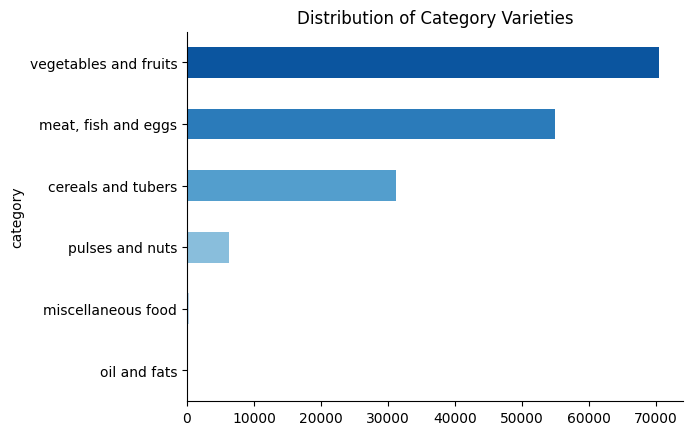

In [20]:
# Distribution of Rice Varieties
from matplotlib import pyplot as plt
import seaborn as sns

# Get rice variety counts and sort in ascending order
category_counts = df.groupby('category').size().sort_values()

# Create color palette (light to dark)
num_varieties = len(category_counts)
color_palette = sns.color_palette("Blues", num_varieties)  # Reversed Blues palette

# Plot with sorted data and color palette
category_counts.plot(kind='barh', color=color_palette)  # Apply color palette
plt.title("Distribution of Category Varieties")  # Set the title
plt.gca().spines[['top', 'right']].set_visible(False)
print(category_counts)

Summary:

  Vegetables & Fruits and Meat, Fish, & Eggs are the most frequent categories, indicating strong data focus.

  Cereals & Tubers are also well-represented, reflecting staple foods.

  Pulses & Nuts, Miscellaneous Food, and Oil & Fats have much lower frequencies, suggesting less data or monitoring.

  Data analysis should consider this imbalance, with more robust results expected for frequent categories.

  Key takeaway: The data is heavily skewed toward vegetables, fruits, meat, fish, and eggs, requiring careful consideration during analysis.

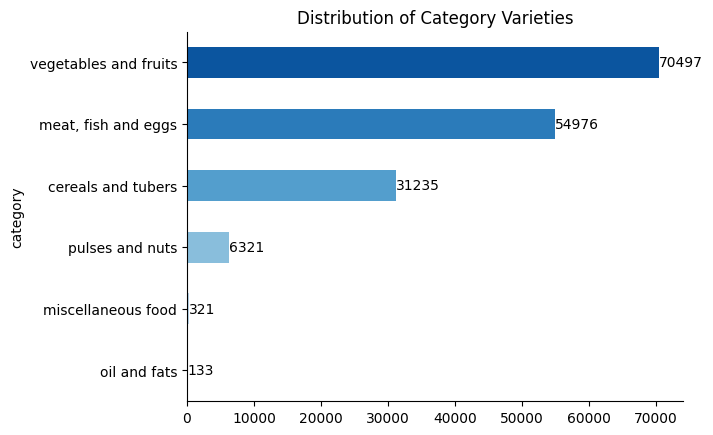

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

# Get variety counts and sort in ascending order
category_counts = df.groupby('category').size().sort_values()

# Create color palette (light to dark)
num_varieties = len(category_counts)
color_palette = sns.color_palette("Blues", num_varieties)  # Reversed Blues palette

# Plot with sorted data and color palette
ax = category_counts.plot(kind='barh', color=color_palette)  # Apply color palette
plt.title("Distribution of Category Varieties")  # Set the title
plt.gca().spines[['top', 'right']].set_visible(False)

# Add values next to bars
for i, v in enumerate(category_counts):
    ax.text(v + 5, i, str(v), color='black', va='center') # Adjust v + 5 for spacing

plt.show() # to show the plot

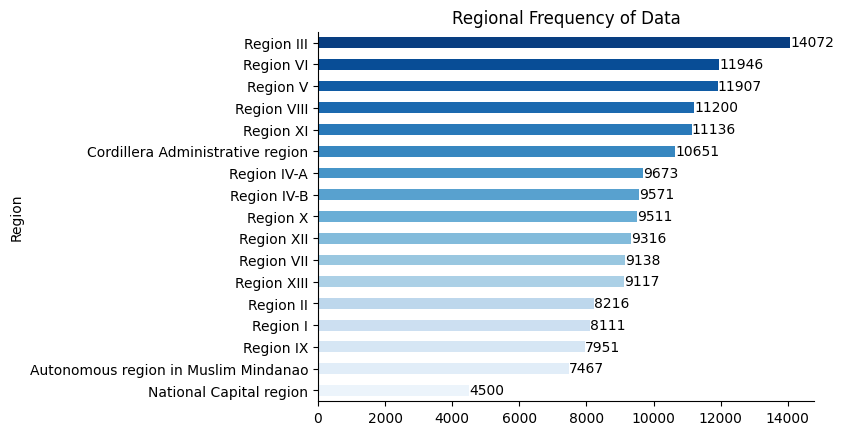

In [22]:
# Get rice variety counts and sort in ascending order
regional_counts = df.groupby('admin1').size().sort_values()

# Create color palette (light to dark)
num_varieties = len(regional_counts)
color_palette = sns.color_palette("Blues", num_varieties)  # Reversed Blues palette

# Plot with sorted data and color palette
ax = regional_counts.plot(kind='barh', color=color_palette)  # Apply color palette
plt.title("Regional Frequency of Data")  # Set the title
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel('Region')

# Add values next to bars
for i, v in enumerate(regional_counts):
    ax.text(v + 5, i, str(v), color='black', va='center') # Adjust v + 5 for spacing

plt.show() # to show the plot

In [23]:
# Get rice variety counts and sort in ascending order
regional_counts

,0
admin1,
National Capital region,4500
Autonomous region in Muslim Mindanao,7467
Region IX,7951
Region I,8111
Region II,8216
Region XIII,9117
Region VII,9138
Region XII,9316
Region X,9511


## Cost Analysis
- What is the highest and lowest price recorded, particularly in region, category, commodity and year?

In [24]:
# Find the highest price
highest_price = df['price'].max()
print(f"The highest price recorded is: {highest_price}")

# Find the row with the highest price
highest_price_row = df[df['price'] == highest_price]

# Display information about the highest price
print("\nInformation about the highest price:")
highest_price_row

The highest price recorded is: 1166.0

Information about the highest price:


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
131152,2023-01-15,Region III,Tarlac,Tarlac,15.489866,120.591249,"meat, fish and eggs",Shrimp (tiger),KG,actual,Retail,PHP,1166.0,21.0629


The highest recorded price in the dataset is 1166.0 PHP (approximately 21.06 USD), observed for tiger shrimp within the "meat, fish and eggs" category. This price was recorded on January 15, 2023, at a retail market in Tarlac, located in the Region III of the Philippines. The price is based on a per-kilogram unit, indicating a notable peak for this specific commodity and location within the dataset.

In [25]:
# Find the lowest price
lowest_price = df['price'].min()
print(f"The lowest price recorded is: {lowest_price}")

# Find the row with the lowest price
lowest_price_row = df[df['price'] == lowest_price]

# Display information about the lowest price
print("\nInformation about the lowest price:")
lowest_price_row

The lowest price recorded is: 1.6

Information about the lowest price:


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
23179,2016-07-15,Cordillera Administrative region,Benguet,La Trinidad,16.455,120.5875,vegetables and fruits,Cabbage,KG,actual,Wholesale,PHP,1.6,0.0342


The lowest recorded price in the dataset is 1.6 PHP (approximately 0.0342 USD), observed for cabbage within the "vegetables and fruits" category. This price was recorded on July 15, 2016, at a wholesale market in La Trinidad, Benguet, within the Cordillera Administrative Region. The price is based on a per-kilogram unit, representing a significant low point for this commodity within the dataset.

In [26]:
#cereal and tubers high and low price
lowest_price_cereal = filtered_cereal['price'].min()
highest_price_cereal = filtered_cereal['price'].max()

In [27]:
print("Cereal and Tubers Information about the lowest price:")
# Find the row with the lowest price
lowest_price_cereal_row = filtered_cereal[filtered_cereal['price'] == lowest_price_cereal]
lowest_price_cereal_row

Cereal and Tubers Information about the lowest price:


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
311,2000-09-15,Region XII,South Cotabato,Koronadal,6.503056,124.846944,cereals and tubers,Maize (yellow),KG,actual,Wholesale,PHP,5.55,0.1218


In [28]:
print("Cereal and Tubers Information about the highest price:")
# Find the row with the highest price
highest_price_cereal_row = filtered_cereal[filtered_cereal['price'] == highest_price_cereal]
highest_price_cereal_row

Cereal and Tubers Information about the highest price:


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
156261,2023-11-15,Region V,Masbate,Camarines Sur,12.55399,123.27465,cereals and tubers,Potatoes (Irish),KG,actual,Retail,PHP,239.75,4.3043


In [29]:
#cereal and tubers high and low price
lowest_price_veg = filtered_veg['price'].min()
highest_price_veg = filtered_veg['price'].max()

In [30]:
print("Vegetables and fruits Information about the lowest price:")
# Find the row with the lowest price
lowest_price_veg_row = filtered_veg[filtered_veg['price'] == lowest_price_veg]
lowest_price_veg_row

Vegetables and fruits Information about the lowest price:


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
23179,2016-07-15,Cordillera Administrative region,Benguet,La Trinidad,16.455,120.5875,vegetables and fruits,Cabbage,KG,actual,Wholesale,PHP,1.6,0.0342


In [31]:
print("Vegetables and fruits  Information about the highest price:")
# Find the row with the highest price
highest_price_veg_row = filtered_veg[filtered_veg['price'] == highest_price_veg]
highest_price_veg_row

Vegetables and fruits  Information about the highest price:


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
132688,2023-01-15,Region V,Camarines Norte,Camarines Norte,14.11722,122.95554,vegetables and fruits,Onions (red),KG,actual,Retail,PHP,617.5,11.1547


In [32]:
#Meat, fish and eggs high and low price
lowest_price_meat = filtered_meat['price'].min()
highest_price_meat = filtered_meat['price'].max()

In [33]:
print("Meat, fish and eggs Information about the lowest price:")
# Find the row with the lowest price
lowest_price_meat_row = filtered_meat[filtered_meat['price'] == lowest_price_meat]
lowest_price_meat_row

Meat, fish and eggs Information about the lowest price:


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
25423,2017-05-15,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,"meat, fish and eggs",Eggs,Unit,actual,Wholesale,PHP,3.48,0.0702


In [34]:
print("Meat, fish and eggs Information about the highest price:")
# Find the row with the highest price
highest_price_meat_row = filtered_meat[filtered_meat['price'] == highest_price_meat]
highest_price_meat_row

Meat, fish and eggs Information about the highest price:


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
131152,2023-01-15,Region III,Tarlac,Tarlac,15.489866,120.591249,"meat, fish and eggs",Shrimp (tiger),KG,actual,Retail,PHP,1166.0,21.0629


In [35]:
#pulses and nutshigh and low price
lowest_price_pulses = filtered_pulses['price'].min()
highest_price_pulses = filtered_pulses['price'].max()

In [36]:
print("Pulses and nuts Information about the lowest price:")
# Find the row with the lowest price
lowest_price_pulses_row = filtered_pulses[filtered_pulses['price'] == lowest_price_pulses]
lowest_price_pulses_row

Pulses and nuts Information about the lowest price:


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
40022,2020-06-15,Cordillera Administrative region,Abra,Abra,17.600651,120.619362,pulses and nuts,Groundnuts (unshelled),KG,actual,Retail,PHP,28.17,0.5608


In [37]:
print("Pulses and nuts Information about the highest price:")
# Find the row with the highest price
highest_price_pulses_row = filtered_pulses[filtered_pulses['price'] == highest_price_pulses]
highest_price_pulses_row

Pulses and nuts Information about the highest price:


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
65806,2020-12-15,Cordillera Administrative region,Mountain Province,Mountain Province,17.089534,120.976639,pulses and nuts,Groundnuts (shelled),KG,actual,Retail,PHP,250.0,5.1997


In [38]:
#miscellaneous food high and low price
lowest_price_msc= filtered_msc['price'].min()
highest_price_msc = filtered_msc['price'].max()

In [39]:
print("Miscellaneous food Information about the lowest price:")
# Find the row with the lowest price
lowest_price_msc_row = filtered_msc[filtered_msc['price'] == lowest_price_msc]
lowest_price_msc_row

Miscellaneous food Information about the lowest price:


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
71648,2021-02-15,Region XII,North Cotabato,Kidapawan City,7.012572,125.089988,miscellaneous food,Sugar (brown),KG,aggregate,Retail,PHP,37.93,0.7913


In [40]:
print("Miscellaneous food Information about the highest price:")
# Find the row with the highest price
highest_price_msc_row = filtered_msc[filtered_msc['price'] == highest_price_msc]
highest_price_msc_row

Miscellaneous food Information about the highest price:


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
59998,2020-11-15,Region VI,Iloilo,Iloilo City,10.696944,122.564444,miscellaneous food,Sugar (white),KG,aggregate,Retail,PHP,70.0,1.4507


In [41]:
#Oil and fats high and low price
lowest_price_oil= filtered_oils['price'].min()
highest_price_oil = filtered_oils['price'].max()

In [42]:
print("Oil and fats Information about the lowest price:")
# Find the row with the lowest price
lowest_price_oil_row = filtered_oils[filtered_oils['price'] == lowest_price_oil]
lowest_price_oil_row

Oil and fats Information about the lowest price:


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
64379,2020-12-15,Region IV-A,Batangas,Batangas City,13.757003,121.055096,oil and fats,Oil (cooking),750 ML,aggregate,Retail,PHP,18.29,0.3804


In [43]:
print("Oil and fats Information about the highest price:")
# Find the row with the highest price
highest_price_oil_row = filtered_oils[filtered_oils['price'] == highest_price_oil]
highest_price_oil_row

Oil and fats Information about the highest price:


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
71481,2021-02-15,Region VII,Cebu,Cebu City,10.311111,123.891667,oil and fats,Oil (cooking),750 ML,aggregate,Retail,PHP,121.0,2.524


## By Category Analysis

### vegatables and fruits


In [44]:
import pandas as pd

# Assuming your DataFrame is named 'df' and contains the 'commodity' column

# Create a list of vegetables for each group
group1_vegetables = ['Onions (white)', 'Onions (red)', 'Garlic', 'Garlic (large)', 'Garlic (small)', 'Ginger', 'Tomatoes', 'Beans (string)', 'Beans (green, fresh)', 'Cabbage', 'Cabbage (chinese)', 'Carrots']
group2_vegetables = ['Bananas (lakatan)', 'Bananas (latundan)', 'Bananas (saba)', 'Mangoes (carabao)', 'Mangoes (piko)', 'Mandarins', 'Pineapples']

# Filter the DataFrame for each group
group1_veg = df[df['commodity'].isin(group1_vegetables)]
group2_fruit = df[df['commodity'].isin(group2_vegetables)]

# Print the resulting DataFrames
#print("Group 1 Vegetables:\n", group1_veg)
#print("\nGroup 2 Vegetables:\n", group2_fruit)

In [45]:
# Find the initial and latest dates
min_date = group2_fruit['date'].min()
max_date = group2_fruit['date'].max()

print(f"Initial Date: {min_date}")
print(f"Latest Date: {max_date}")

Initial Date: 2020-05-15 00:00:00
Latest Date: 2024-01-15 00:00:00


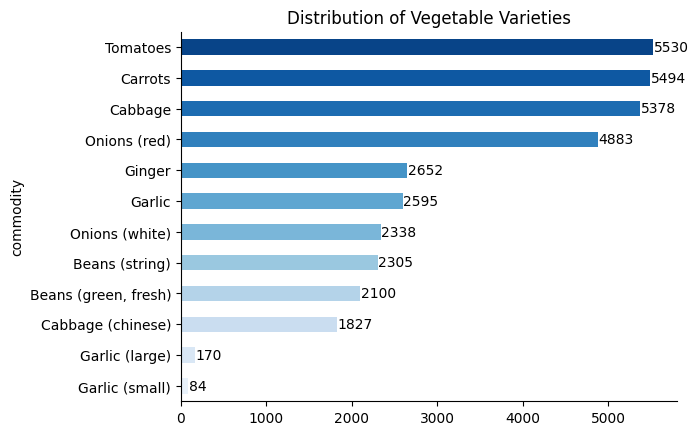

commodity
Garlic (small)            84
Garlic (large)           170
Cabbage (chinese)       1827
Beans (green, fresh)    2100
Beans (string)          2305
Onions (white)          2338
Garlic                  2595
Ginger                  2652
Onions (red)            4883
Cabbage                 5378
Carrots                 5494
Tomatoes                5530
dtype: int64


In [46]:
from matplotlib import pyplot as plt
import seaborn as sns

# Get veg variety counts and sort in ascending order
group1_veg_counts = group1_veg.groupby('commodity').size().sort_values()

# Create color palette (light to dark)
num_varieties = len(group1_veg_counts)
color_palette = sns.color_palette("Blues", num_varieties)  # Reversed Blues palette

# Plot with sorted data and color palette
ax = group1_veg_counts.plot(kind='barh', color=color_palette)  # Apply color palette
plt.title("Distribution of Vegetable Varieties")  # Set the title
plt.gca().spines[['top', 'right']].set_visible(False)

# Add values next to bars
for i, v in enumerate(group1_veg_counts):
    ax.text(v + 5, i, str(v), color='black', va='center') # Adjust v + 5 for spacing

plt.show() # to show the plot
print(group1_veg_counts)

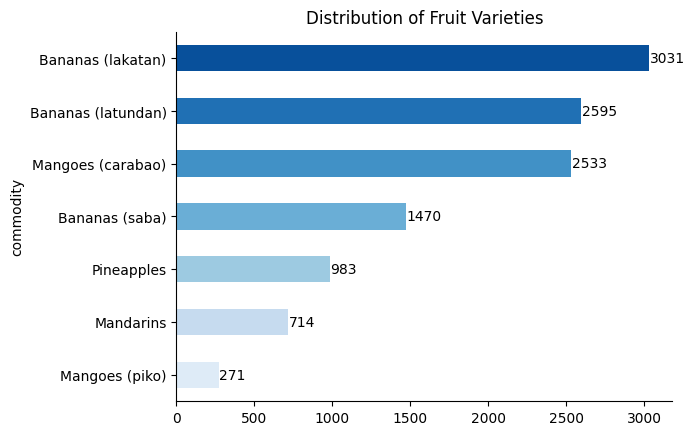

commodity
Mangoes (piko)         271
Mandarins              714
Pineapples             983
Bananas (saba)        1470
Mangoes (carabao)     2533
Bananas (latundan)    2595
Bananas (lakatan)     3031
dtype: int64


In [47]:
from matplotlib import pyplot as plt
import seaborn as sns

# Get veg variety counts and sort in ascending order
group2_fruit_counts = group2_fruit.groupby('commodity').size().sort_values()

# Create color palette (light to dark)
num_varieties = len(group2_fruit_counts)
color_palette = sns.color_palette("Blues", num_varieties)  # Reversed Blues palette

# Plot with sorted data and color palette
ax = group2_fruit_counts.plot(kind='barh', color=color_palette)  # Apply color palette
plt.title("Distribution of Fruit Varieties")  # Set the title
plt.gca().spines[['top', 'right']].set_visible(False)

# Add values next to bars
for i, v in enumerate(group2_fruit_counts):
    ax.text(v + 5, i, str(v), color='black', va='center') # Adjust v + 5 for spacing

plt.show() # to show the plot
print(group2_fruit_counts)

#### Average price per year with vegetables and fruits

<ipython-input-48-12c21580d289>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1_veg['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')


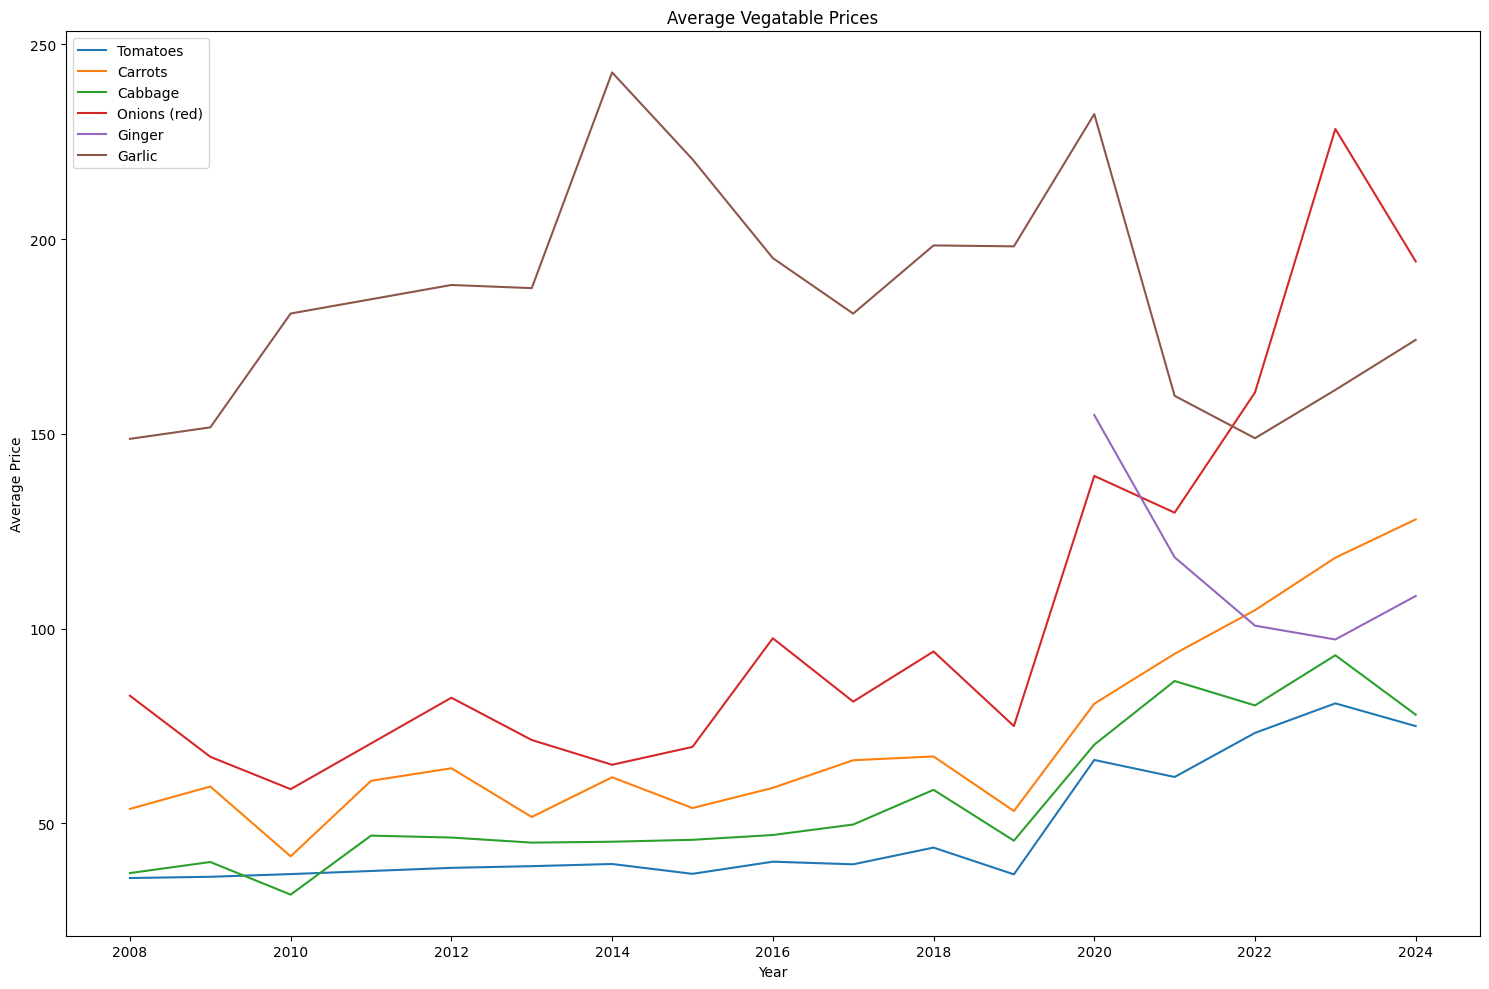

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'date' column to datetime for filtering
group1_veg['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Define start and end dates
start_date = pd.to_datetime('15/01/2008', format='%d/%m/%Y')
end_date = pd.to_datetime('15/01/2024', format='%d/%m/%Y') # Define end date

# Filter the data between the start and end dates
filtered_group1_veg = group1_veg[(group1_veg['date'] >= start_date) & (group1_veg['date'] <= end_date)]

# Extract the year from the 'date' column
filtered_group1_veg['year'] = filtered_group1_veg['date'].dt.year

# Convert 'price' column to numeric, handling errors
filtered_group1_veg['price'] = pd.to_numeric(filtered_group1_veg['price'], errors='coerce') #This line handles the problem.

# Group the data by 'commodity' (province) and 'year', and calculate the average price for each province in each year
average_prices_province_yearly = filtered_group1_veg.groupby(['commodity', 'year'])['price'].mean().reset_index()

# Group the data by 'commodity' (province) and 'year', and calculate the average price for each province in each year
average_prices_province_yearly = filtered_group1_veg.groupby(['commodity', 'year'])['price'].mean().reset_index()

# Select the top 5 provinces based on the value counts
top_veg = filtered_group1_veg['commodity'].value_counts().head(6).index.tolist()

# Filter the data for the top 5 provinces
top_veg_data = average_prices_province_yearly[average_prices_province_yearly['commodity'].isin(top_veg)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the average rice prices for the top 5 commodity over the years
for veg in top_veg:
    veg_prices = top_veg_data[top_veg_data['commodity'] == veg]
    ax.plot(veg_prices['year'], veg_prices['price'], label=veg)

# Add labels and legend
ax.set_title('Average Vegatable Prices')
ax.set_xlabel('Year')
ax.set_ylabel('Average Price')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [49]:
#file_path = '/content/drive/My Drive/Data Analytics/Projects/top_veg_data.csv'  # Replace with your desired path
#top_veg_data.to_csv(file_path, index=False)

In [50]:
top_veg_data['commodity'].unique()

array(['Cabbage', 'Carrots', 'Garlic', 'Ginger', 'Onions (red)',
       'Tomatoes'], dtype=object)

In [51]:
# Assuming you have top_veg_data DataFrame
import numpy as np # Import numpy

def calculate_rate_of_change(data, commodity, start_year, end_year):
  """Calculates the rate of change of average prices for a given commodity
  between two years.

  Args:
    data: DataFrame containing commodity, year, and price.
    commodity: The commodity to calculate the rate of change for.
    start_year: The starting year.
    end_year: The ending year.

  Returns:
    The rate of change as a percentage, or np.nan if data is missing.
  """
  start_price_data = data[(data['commodity'] == commodity) & (data['year'] == start_year)]['price']
  end_price_data = data[(data['commodity'] == commodity) & (data['year'] == end_year)]['price']

  # Check if data is available for both years
  if start_price_data.empty or end_price_data.empty:
    return np.nan  # Return NaN if data is missing

  start_price = start_price_data.values[0]
  end_price = end_price_data.values[0]
  rate_of_change = ((end_price - start_price) / start_price) * 100
  return rate_of_change

# Get the minimum and maximum years in your data
min_year = top_veg_data['year'].min()
max_year = top_veg_data['year'].max()

# Calculate rate of change for each commodity between min_year and max_year
for commodity in top_veg_data['commodity'].unique():
  rate_change = calculate_rate_of_change(top_veg_data, commodity, min_year, max_year)
  print(f"Rate of change for {commodity} between {min_year} and {max_year}: {rate_change:.2f}%")

Rate of change for Cabbage between 2008 and 2024: 109.11%
Rate of change for Carrots between 2008 and 2024: 138.31%
Rate of change for Garlic between 2008 and 2024: 17.09%
Rate of change for Ginger between 2008 and 2024: nan%
Rate of change for Onions (red) between 2008 and 2024: 134.70%
Rate of change for Tomatoes between 2008 and 2024: 108.39%


##### Problem
- To filter datapoint that has initial year 2008 and latest year 2023. Exclude those datapoints within a range that has initial year later 2009-2023

<ipython-input-52-cc186cc7d2cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2_fruit['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')


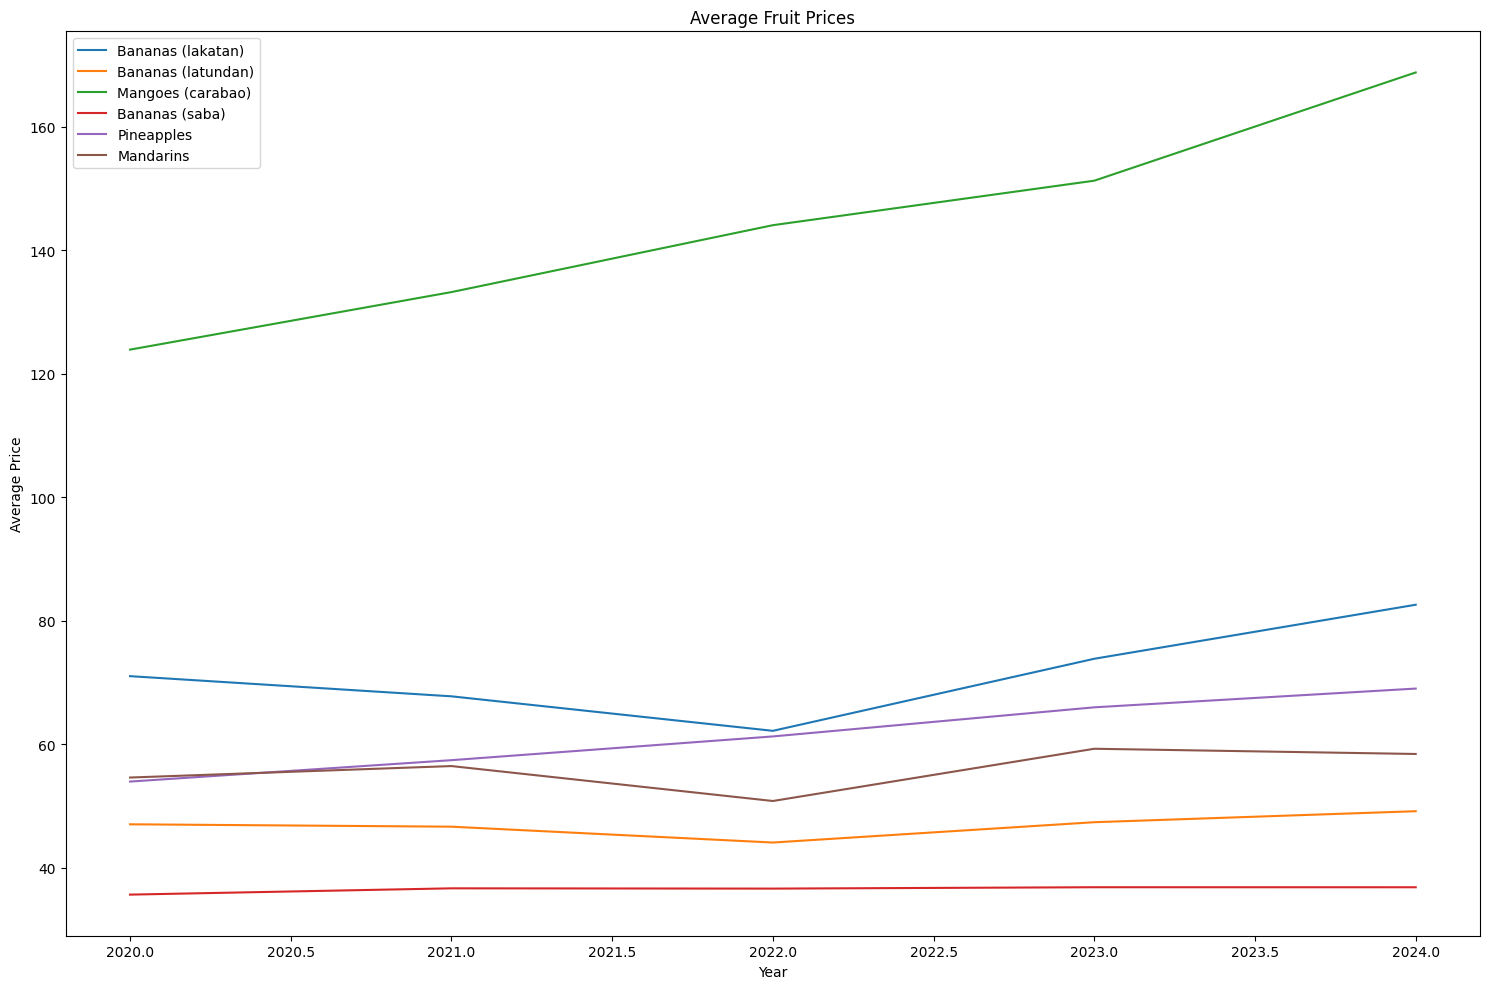

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'date' column to datetime for filtering
group2_fruit['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Define start and end dates
start_date = pd.to_datetime('15/05/2020', format='%d/%m/%Y')
end_date = pd.to_datetime('15/01/2024', format='%d/%m/%Y') # Define end date

# Filter the data between the start and end dates
filtered_group2_fruit = group2_fruit[(group2_fruit['date'] >= start_date) & (group2_fruit['date'] <= end_date)]

# Extract the year from the 'date' column
filtered_group2_fruit['year'] = filtered_group2_fruit['date'].dt.year

# Convert 'price' column to numeric, handling errors
filtered_group2_fruit['price'] = pd.to_numeric(filtered_group2_fruit['price'], errors='coerce') #This line handles the problem.

# Group the data by 'commodity' (province) and 'year', and calculate the average price for each province in each year
average_prices_province_yearly = filtered_group2_fruit.groupby(['commodity', 'year'])['price'].mean().reset_index()

# Group the data by 'commodity' (province) and 'year', and calculate the average price for each province in each year
average_prices_province_yearly = filtered_group2_fruit.groupby(['commodity', 'year'])['price'].mean().reset_index()

# Select the top 5 provinces based on the value counts
top_fruit = filtered_group2_fruit['commodity'].value_counts().head(6).index.tolist()

# Filter the data for the top 5 provinces
top_fruit_data = average_prices_province_yearly[average_prices_province_yearly['commodity'].isin(top_fruit)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the average fruit  prices for the top 5 commodity over the years
for fruit in top_fruit:
    fruit_prices = top_fruit_data[top_fruit_data['commodity'] == fruit]
    ax.plot(fruit_prices['year'], fruit_prices['price'], label=fruit)

# Add labels and legend
ax.set_title('Average Fruit Prices')
ax.set_xlabel('Year')
ax.set_ylabel('Average Price')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [86]:
import numpy as np # Import numpy

def calculate_rate_of_change(data, commodity, start_year, end_year):
  """Calculates the rate of change of average prices for a given commodity
  between two years.

  Args:
    data: DataFrame containing commodity, year, and price.
    commodity: The commodity to calculate the rate of change for.
    start_year: The starting year.
    end_year: The ending year.

  Returns:
    The rate of change as a percentage, or np.nan if data is missing.
  """
  start_price_data = data[(data['commodity'] == commodity) & (data['year'] == start_year)]['price']
  end_price_data = data[(data['commodity'] == commodity) & (data['year'] == end_year)]['price']

  # Check if data is available for both years
  if start_price_data.empty or end_price_data.empty:
    return np.nan  # Return NaN if data is missing

  start_price = start_price_data.values[0]
  end_price = end_price_data.values[0]
  rate_of_change = ((end_price - start_price) / start_price) * 100
  return rate_of_change

# Get the minimum and maximum years in your data
min_year = top_fruit_data['year'].min()
max_year = top_fruit_data['year'].max()

# Calculate rate of change for each commodity between min_year and max_year
for commodity in top_fruit_data['commodity'].unique():
  rate_change = calculate_rate_of_change(top_fruit_data, commodity, min_year, max_year)
  print(f"Rate of change for {commodity} between {min_year} and {max_year}: {rate_change:.2f}%")

Rate of change for Bananas (lakatan) between 2020 and 2024: 16.29%
Rate of change for Bananas (latundan) between 2020 and 2024: 4.51%
Rate of change for Bananas (saba) between 2020 and 2024: 3.34%
Rate of change for Mandarins between 2020 and 2024: 6.99%
Rate of change for Mangoes (carabao) between 2020 and 2024: 36.23%
Rate of change for Pineapples between 2020 and 2024: 27.92%


#### Summary for Vegetable and Fruits

***Summary: Vegetables and Fruit***

**Distribution of Vegetable Varieties:**

- Most Common: Cabbage (5378), Tomatoes (5530), and Onions (red) are the most frequently recorded vegetable varieties.
- Least Common: Garlic (small) is the least frequently recorded vegetable variety.
- Variety: The data includes a diverse range of vegetables, including leafy greens (beans), root vegetables (carrots), and alliums (onions, garlic).

**Distribution of Fruit Varieties:**

- Most Common: Bananas (lakatan) is the most frequently recorded fruit variety.
- Least Common: Mangoes (piko) is the least frequently recorded fruit variety.
- Variety: The data includes a range of fruits, including citrus fruits (mandarins), tropical fruits (bananas, mangoes), and pineapple.

**Rate of Change (2008-2024):**

- Highest Growth: Carrots experienced the highest growth rate (138.31%), indicating a significant increase in their market presence or production.
- Moderate Growth: Cabbage, Onions (red), and Tomatoes also showed substantial growth rates (above 100%).
- Low Growth: Garlic had a relatively low growth rate (17.09%), suggesting a slower increase in its market share.
- Ginger: The rate of change for Ginger is listed as "nan," which likely indicates missing or insufficient data to calculate the growth rate accurately.

### Cereals and Tubers


In [53]:
import pandas as pd

# Assuming your DataFrame is named 'df' and contains the 'commodity' column

# Create a list of vegetables for each group
group1_rice = df[(df['category'] == 'cereals and tubers') & (df['commodity'].str.contains('Rice', case=False))]
group2_maize = df[(df['category'] == 'cereals and tubers') & (df['commodity'].str.contains('Maize', case=False))]


In [54]:
# Find the initial and latest dates
min_date = group1_rice['date'].min()
max_date = group1_rice['date'].max()

print("Rice")
print(f"Initial Date: {min_date}")
print(f"Latest Date: {max_date}")

Rice
Initial Date: 2000-01-15 00:00:00
Latest Date: 2024-01-15 00:00:00


In [55]:
# Find the initial and latest dates
min_date = group2_maize['date'].min()
max_date = group2_maize['date'].max()

print("Maize")
print(f"Initial Date: {min_date}")
print(f"Latest Date: {max_date}")

Maize
Initial Date: 2000-01-15 00:00:00
Latest Date: 2024-01-15 00:00:00


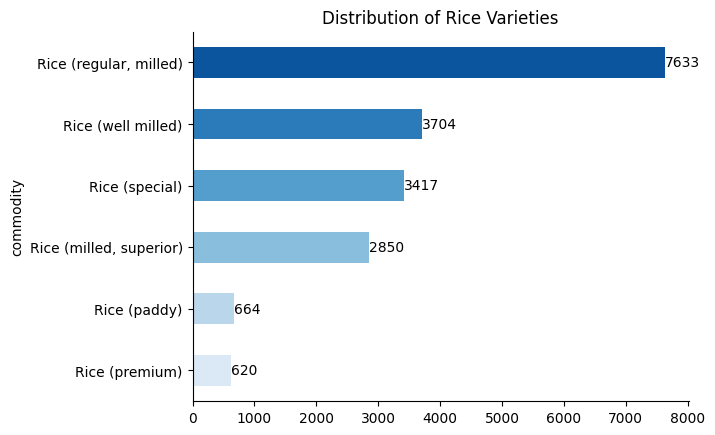

commodity
Rice (premium)              620
Rice (paddy)                664
Rice (milled, superior)    2850
Rice (special)             3417
Rice (well milled)         3704
Rice (regular, milled)     7633
dtype: int64


In [56]:
from matplotlib import pyplot as plt
import seaborn as sns

# Get veg variety counts and sort in ascending order
group1_rice_counts = group1_rice.groupby('commodity').size().sort_values()

# Create color palette (light to dark)
num_varieties = len(group1_rice_counts)
color_palette = sns.color_palette("Blues", num_varieties)  # Reversed Blues palette

# Plot with sorted data and color palette
ax = group1_rice_counts.plot(kind='barh', color=color_palette)  # Apply color palette
plt.title("Distribution of Rice Varieties")  # Set the title
plt.gca().spines[['top', 'right']].set_visible(False)

# Add values next to bars
for i, v in enumerate(group1_rice_counts):
    ax.text(v + 5, i, str(v), color='black', va='center') # Adjust v + 5 for spacing

plt.show() # to show the plot
print(group1_rice_counts)

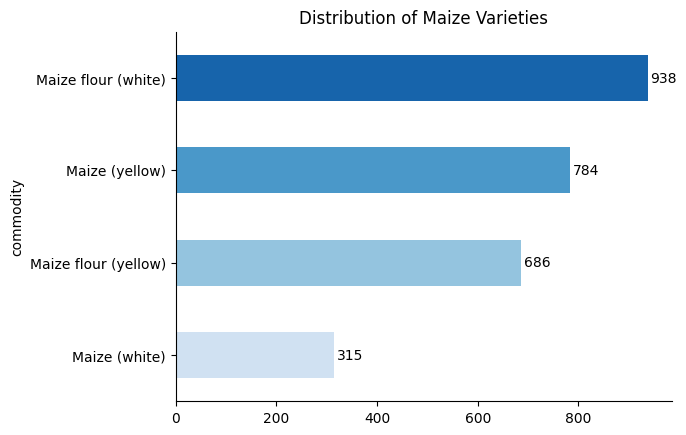

commodity
Maize (white)           315
Maize flour (yellow)    686
Maize (yellow)          784
Maize flour (white)     938
dtype: int64


In [57]:
from matplotlib import pyplot as plt
import seaborn as sns

# Get veg variety counts and sort in ascending order
group2_maize_counts = group2_maize.groupby('commodity').size().sort_values()

# Create color palette (light to dark)
num_varieties = len(group2_maize_counts)
color_palette = sns.color_palette("Blues", num_varieties)  # Reversed Blues palette

# Plot with sorted data and color palette
ax = group2_maize_counts.plot(kind='barh', color=color_palette)  # Apply color palette
plt.title("Distribution of Maize Varieties")  # Set the title
plt.gca().spines[['top', 'right']].set_visible(False)

# Add values next to bars
for i, v in enumerate(group2_maize_counts):
    ax.text(v + 5, i, str(v), color='black', va='center') # Adjust v + 5 for spacing

plt.show() # to show the plot
print(group2_maize_counts)

#### Average price per year with cereals and tubers

<ipython-input-58-7dc1b061938b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1_rice['date'] = pd.to_datetime(group1_rice['date'])
<ipython-input-58-7dc1b061938b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1_rice['year'] = group1_rice['date'].dt.year
<ipython-input-58-7dc1b061938b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

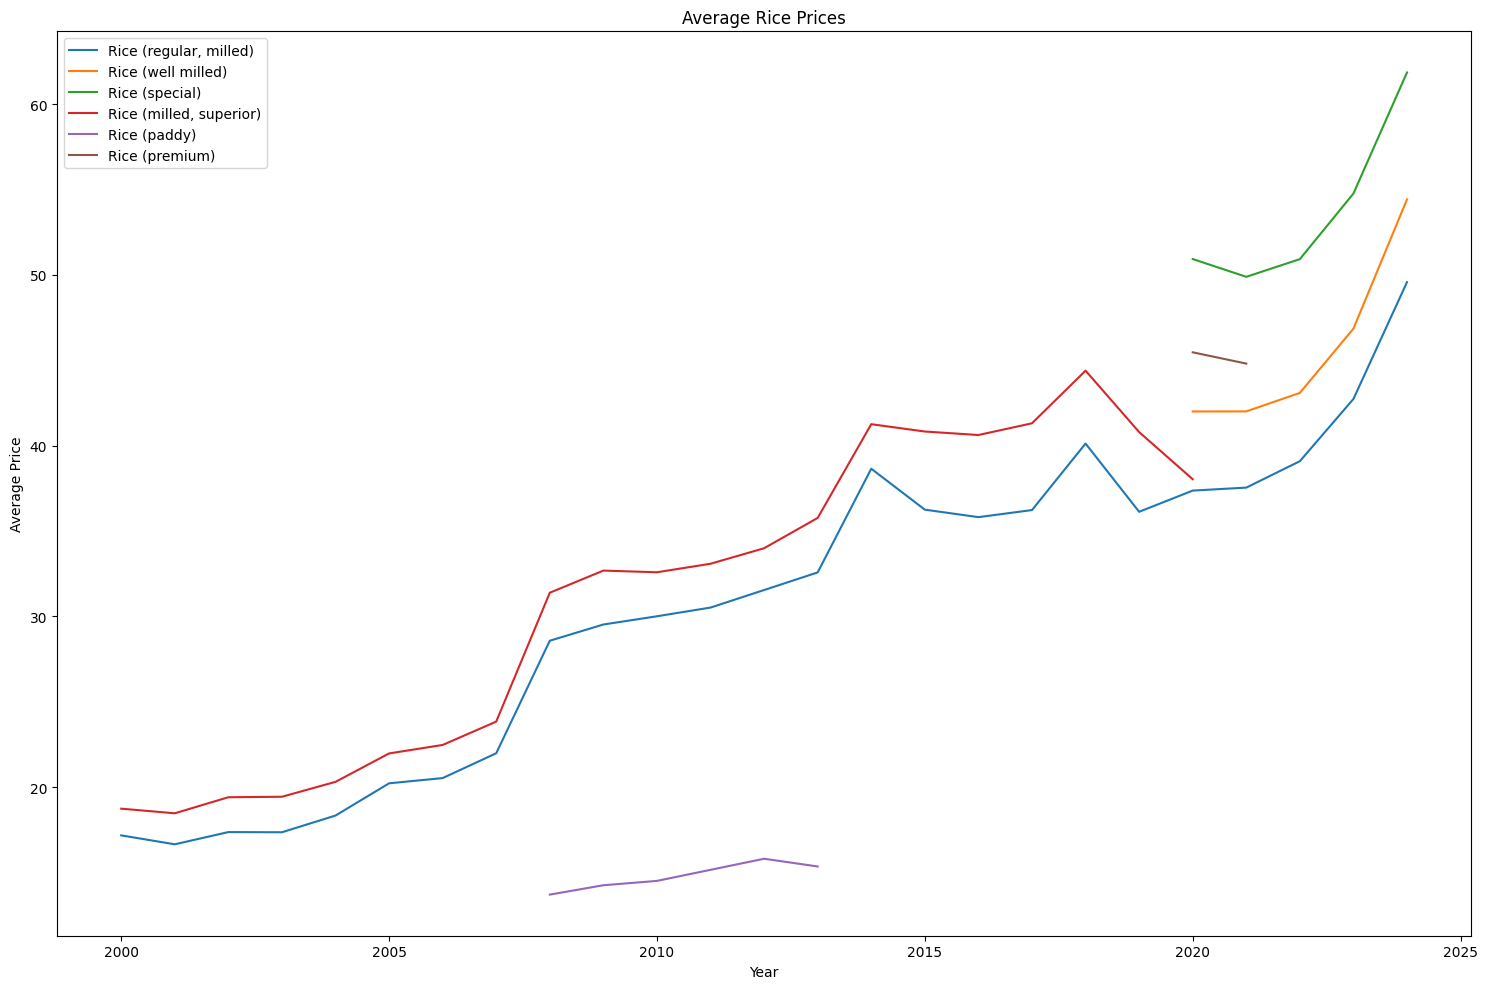

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'date' column to datetime format
group1_rice['date'] = pd.to_datetime(group1_rice['date'])

# Extract the year from the 'date' column
group1_rice['year'] = group1_rice['date'].dt.year

# Convert 'price' column to numeric, handling errors
group1_rice['price'] = pd.to_numeric(group1_rice['price'], errors='coerce') # This line handles the problem.

# Group the data by 'admin2' (province) and 'year', and calculate the average price for each province in each year
average_prices_province_yearly = group1_rice.groupby(['commodity', 'year'])['price'].mean().reset_index()

# Select the top 5 provinces based on the value counts
top_rice = group1_rice['commodity'].value_counts().head(6).index.tolist()

# Filter the data for the top 5 provinces
top_rice_data = average_prices_province_yearly[average_prices_province_yearly['commodity'].isin(top_rice)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the average rice prices for the top 5 provinces over the years
for rice in top_rice:
    rice_prices = top_rice_data[top_rice_data['commodity'] == rice]
    ax.plot(rice_prices['year'], rice_prices['price'], label=rice)

# Add labels and legend
ax.set_title('Average Rice Prices')
ax.set_xlabel('Year')
ax.set_ylabel('Average Price')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [59]:
top_rice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   commodity  63 non-null     object 
 1   year       63 non-null     int32  
 2   price      63 non-null     float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.4+ KB


In [60]:
# Assuming you have top_rice_data DataFrame
import numpy as np # Import numpy

def calculate_rate_of_change(data, commodity, start_year, end_year):
  """Calculates the rate of change of average prices for a given commodity
  between two years.

  Args:
    data: DataFrame containing commodity, year, and price.
    commodity: The commodity to calculate the rate of change for.
    start_year: The starting year.
    end_year: The ending year.

  Returns:
    The rate of change as a percentage, or np.nan if data is missing.
  """
  start_price_data = data[(data['commodity'] == commodity) & (data['year'] == start_year)]['price']
  end_price_data = data[(data['commodity'] == commodity) & (data['year'] == end_year)]['price']

  # Check if data is available for both years
  if start_price_data.empty or end_price_data.empty:
    return np.nan  # Return NaN if data is missing

  start_price = start_price_data.values[0]
  end_price = end_price_data.values[0]
  rate_of_change = ((end_price - start_price) / start_price) * 100
  return rate_of_change

# Get the minimum and maximum years in your data
min_year = 2000
max_year = 2020

# Calculate rate of change for each commodity between min_year and max_year
for commodity in top_rice_data['commodity'].unique():
  rate_change = calculate_rate_of_change(top_rice_data, commodity, min_year, max_year)
  print(f"Rate of change for {commodity} between {min_year} and {max_year}: {rate_change:.2f}%")

Rate of change for Rice (milled, superior) between 2000 and 2020: 102.87%
Rate of change for Rice (paddy) between 2000 and 2020: nan%
Rate of change for Rice (premium) between 2000 and 2020: nan%
Rate of change for Rice (regular, milled) between 2000 and 2020: 117.47%
Rate of change for Rice (special) between 2000 and 2020: nan%
Rate of change for Rice (well milled) between 2000 and 2020: nan%


In [61]:
#file_path = '/content/drive/My Drive/Data Analytics/Projects/top_rice_data.csv'  # Replace with your desired path
#top_rice_data.to_csv(file_path, index=False)

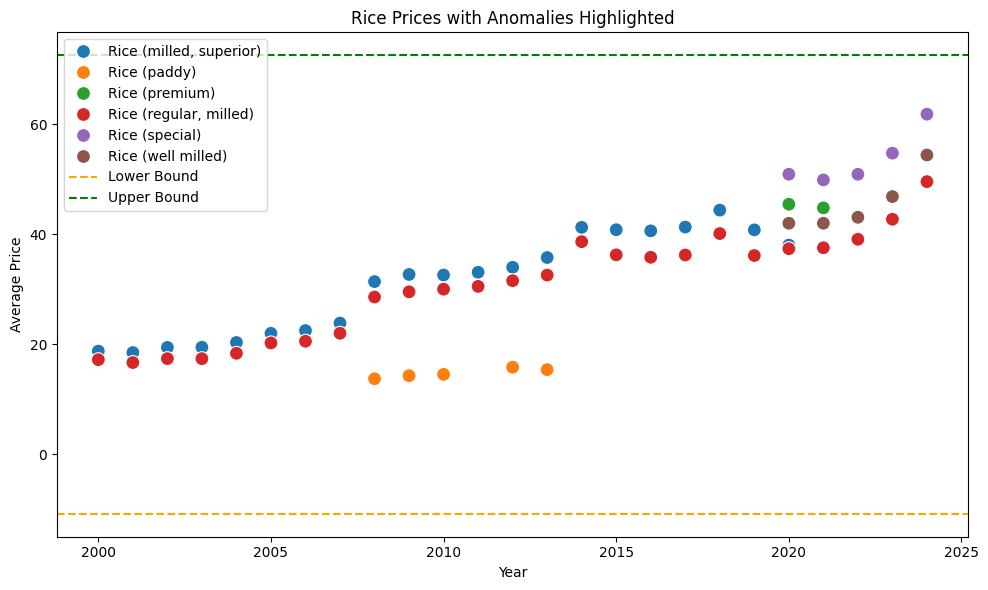

In [62]:
import pandas as pd
import numpy as np

def find_anomalies_iqr(data):
  """
  Identifies anomalies in the 'price' column of the data using the IQR method.

  Args:
    data: A pandas DataFrame with columns 'commodity', 'year', and 'price'.

  Returns:
    A pandas DataFrame containing the anomalies, lower bound, and upper bound.
  """

  # Calculate quantiles
  Q1 = data['price'].quantile(0.25)
  Q3 = data['price'].quantile(0.75)
  IQR = Q3 - Q1

  # Define upper and lower bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify anomalies
  anomalies = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]

  return anomalies, lower_bound, upper_bound # Return lower_bound and upper_bound

# Assuming 'top_maize_data' already exists
data = top_rice_data[['commodity', 'year', 'price']].copy()

# Find anomalies, lower bound, and upper bound
anomalies, lower_bound, upper_bound = find_anomalies_iqr(data)

# Create scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x='year', y='price', hue='commodity', data=data, s=100)  # Use seaborn for scatter plot

# Highlight anomalies in red
sns.scatterplot(x='year', y='price', data=anomalies, color='red', marker='x', s=200, label='Anomalies')

# Add horizontal lines for bounds
plt.axhline(y=lower_bound, color='orange', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='green', linestyle='--', label='Upper Bound')

plt.title('Rice Prices with Anomalies Highlighted')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-63-fae4f7110823>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2_maize['date'] = pd.to_datetime(group2_maize['date'], format='%d/%m/%Y')  # Corrected format
<ipython-input-63-fae4f7110823>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2_maize['year'] = group2_maize['date'].dt.year


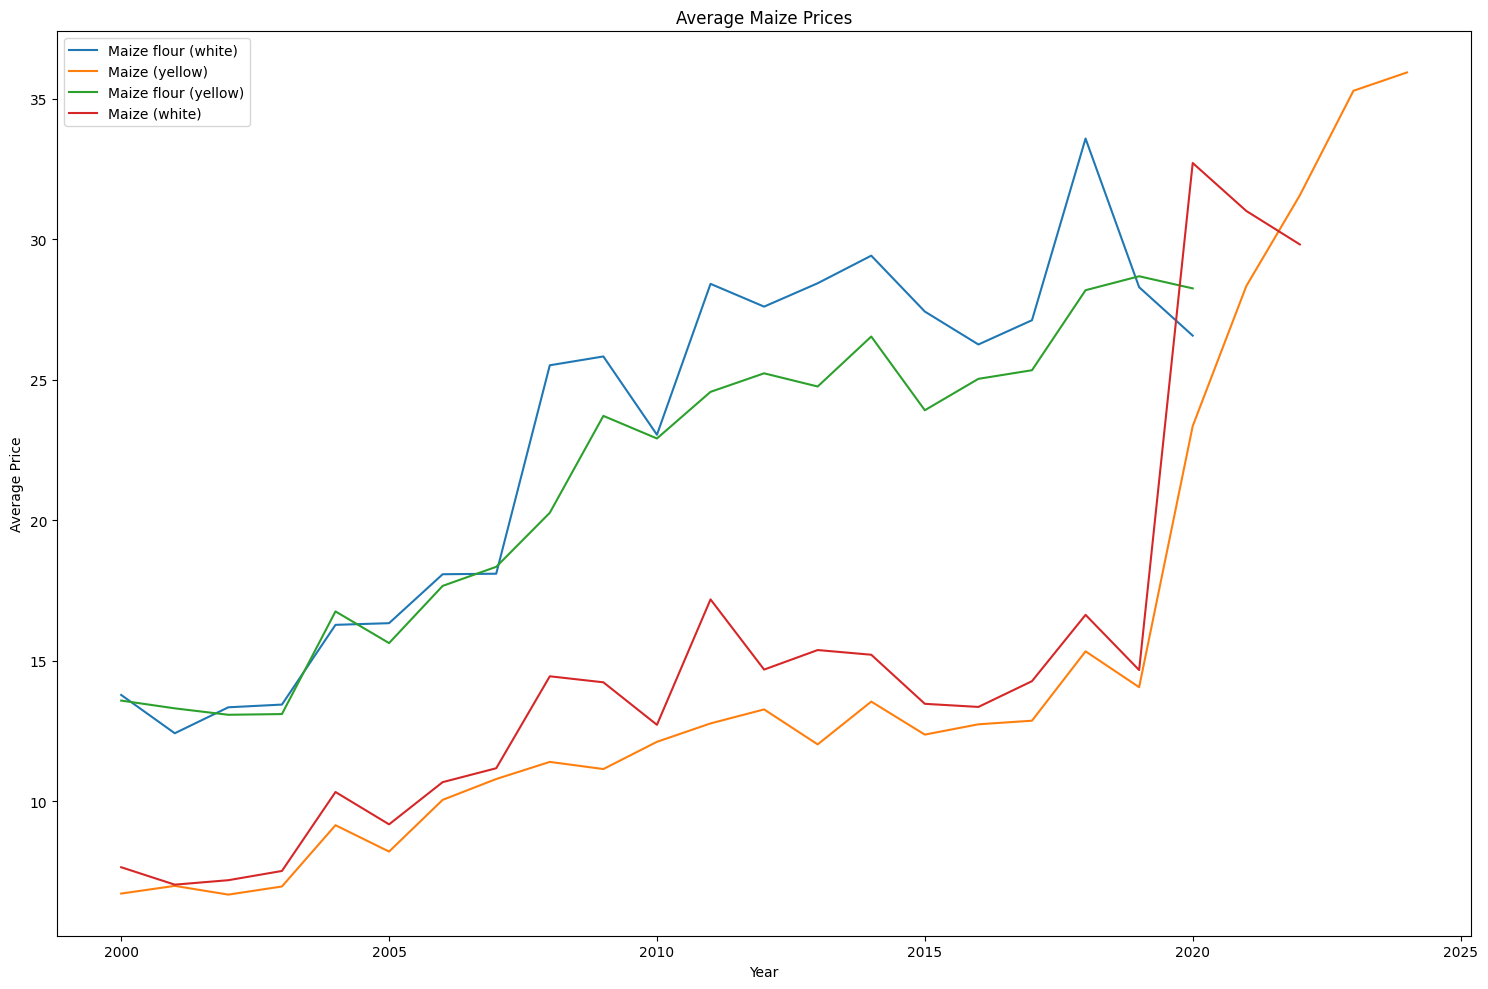

In [63]:
# Convert the 'date' column to datetime format
group2_maize['date'] = pd.to_datetime(group2_maize['date'], format='%d/%m/%Y')  # Corrected format

# Extract the year from the 'date' column
group2_maize['year'] = group2_maize['date'].dt.year

# Convert 'price' column to numeric using .loc
group2_maize.loc[:, 'price'] = pd.to_numeric(group2_maize['price'], errors='coerce')

# Group the data by 'admin2' (province) and 'year', and calculate the average price for each province in each year
average_prices_province_yearly = group2_maize.groupby(['commodity', 'year'])['price'].mean().reset_index()

# Select the top 5 provinces based on the value counts
top_maize = group2_maize['commodity'].value_counts().head(6).index.tolist()

# Filter the data for the top 5 provinces
top_maize_data = average_prices_province_yearly[average_prices_province_yearly['commodity'].isin(top_maize)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the average rice prices for the top 5 provinces over the years
for maize in top_maize:
    maize_prices = top_maize_data[top_maize_data['commodity'] == maize]
    ax.plot(maize_prices['year'], maize_prices['price'], label=maize)

# Add labels and legend
ax.set_title('Average Maize Prices')
ax.set_xlabel('Year')
ax.set_ylabel('Average Price')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [64]:
# Assuming you have top_maize_data DataFrame
import numpy as np # Import numpy

def calculate_rate_of_change(data, commodity, start_year, end_year):
  """Calculates the rate of change of average prices for a given commodity
  between two years.

  Args:
    data: DataFrame containing commodity, year, and price.
    commodity: The commodity to calculate the rate of change for.
    start_year: The starting year.
    end_year: The ending year.

  Returns:
    The rate of change as a percentage, or np.nan if data is missing.
  """
  start_price_data = data[(data['commodity'] == commodity) & (data['year'] == start_year)]['price']
  end_price_data = data[(data['commodity'] == commodity) & (data['year'] == end_year)]['price']

  # Check if data is available for both years
  if start_price_data.empty or end_price_data.empty:
    return np.nan  # Return NaN if data is missing

  start_price = start_price_data.values[0]
  end_price = end_price_data.values[0]
  rate_of_change = ((end_price - start_price) / start_price) * 100
  return rate_of_change

# Get the minimum and maximum years in your data
min_year = 2000
max_year = 2020

# Calculate rate of change for each commodity between min_year and max_year
for commodity in top_maize_data['commodity'].unique():
  rate_change = calculate_rate_of_change(top_maize_data, commodity, min_year, max_year)
  print(f"Rate of change for {commodity} between {min_year} and {max_year}: {rate_change:.2f}%")

Rate of change for Maize (white) between 2000 and 2020: 328.01%
Rate of change for Maize (yellow) between 2000 and 2020: 248.14%
Rate of change for Maize flour (white) between 2000 and 2020: 92.85%
Rate of change for Maize flour (yellow) between 2000 and 2020: 108.09%


In [65]:
#file_path = '/content/drive/My Drive/Data Analytics/Projects/top_maize_data.csv'  # Replace with your desired path
#top_maize_data.to_csv(file_path, index=False)

In [66]:
!pip install -q pandas numpy matplotlib seaborn

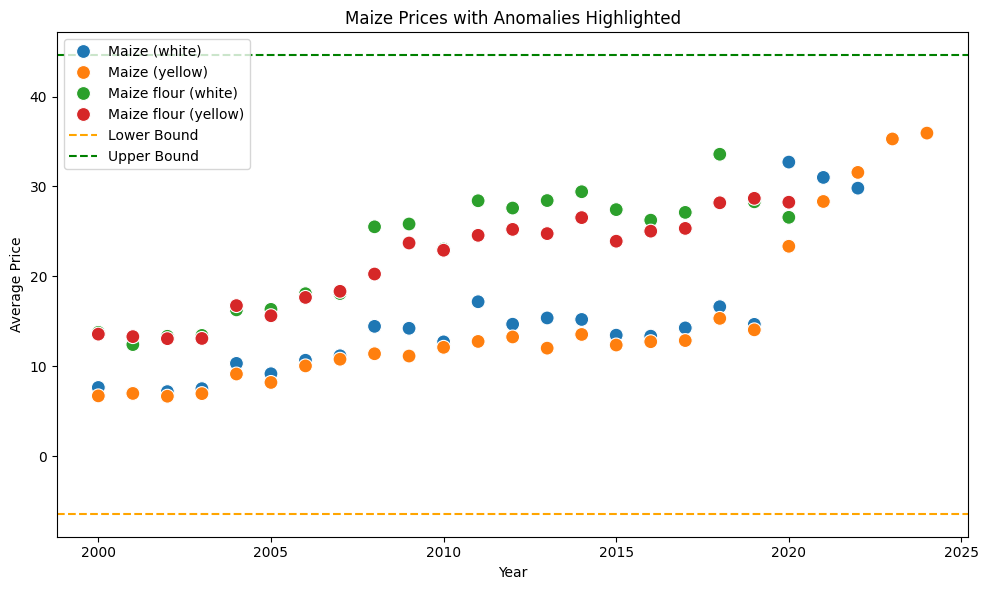

In [67]:
import pandas as pd
import numpy as np

def find_anomalies_iqr(data):
  """
  Identifies anomalies in the 'price' column of the data using the IQR method.

  Args:
    data: A pandas DataFrame with columns 'commodity', 'year', and 'price'.

  Returns:
    A pandas DataFrame containing the anomalies, lower bound, and upper bound.
  """

  # Calculate quantiles
  Q1 = data['price'].quantile(0.25)
  Q3 = data['price'].quantile(0.75)
  IQR = Q3 - Q1

  # Define upper and lower bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify anomalies
  anomalies = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]

  return anomalies, lower_bound, upper_bound # Return lower_bound and upper_bound

# Assuming 'top_maize_data' already exists
data = top_maize_data[['commodity', 'year', 'price']].copy()

# Find anomalies, lower bound, and upper bound
anomalies, lower_bound, upper_bound = find_anomalies_iqr(data)

# Create scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x='year', y='price', hue='commodity', data=data, s=100)  # Use seaborn for scatter plot

# Highlight anomalies in red
sns.scatterplot(x='year', y='price', data=anomalies, color='red', marker='x', s=200, label='Anomalies')

# Add horizontal lines for bounds
plt.axhline(y=lower_bound, color='orange', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='green', linestyle='--', label='Upper Bound')

plt.title('Maize Prices with Anomalies Highlighted')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.tight_layout()
plt.show()

#### Summary for Cereal and Tubers

**Distribution of Rice Varieties:**

- Most Common: Rice (regular, milled) is the most frequently recorded rice variety.
- Least Common: Rice (premium) is the least frequently recorded rice variety.
- Variety: The data includes a range of rice types, from unprocessed (paddy) to various levels of milling (milled, well milled, superior, special).

**Distribution of Maize Varieties:**

- Most Common: Maize flour (white) is the most frequently recorded maize variety.
- Least Common: Maize (white) is the least frequently recorded maize variety.
- Variety: The data includes both whole maize and maize flour, with variations in color (white and yellow).

**Rate of Change (2000-2020):**

- Rice:
    - Rice (regular, milled) shows the highest growth rate (117.47%), indicating a significant increase in its market share or production.
The growth rates for other rice varieties (milled, superior, etc.) are either unavailable (NaN) or show significant growth.

- Maize:
    - Maize (white) exhibits the highest growth rate (328.01%), indicating a substantial increase in its market presence.
Other maize varieties also show significant growth rates, suggesting a general increase in maize production or consumption.

### Meat, Fish and Eggs


In [68]:
filtered_meat['commodity'].unique()

array(['Meat (pork)', 'Fish (fresh)', 'Meat (beef, chops with bones)',
       'Meat (chicken, whole)', 'Eggs', 'Crab', 'Fish (frigate tuna)',
       'Anchovies', 'Fish (milkfish)', 'Fish (roundscad)', 'Meat (beef)',
       'Meat (pork, hock)', 'Meat (pork, with bones)',
       'Shrimp (endeavor)', 'Shrimp (tiger)', 'Fish (mackerel, fresh)',
       'Fish (redbelly yellowtail fusilier)', 'Fish (slipmouth)',
       'Fish (threadfin bream)', 'Fish (tilapia)', 'Eggs (duck)',
       'Meat (pork, with fat)', 'Chicken'], dtype=object)

In [69]:
import pandas as pd

# Assuming your DataFrame is named 'df' and contains the 'commodity' column

# Create a list of vegetables for each group
group1_meat= df[(df['category'] == 'meat, fish and eggs') & (df['commodity'].str.contains('Meat', case=False))]
group2_fish = df[(df['category'] == 'meat, fish and eggs') & (df['commodity'].str.contains('Fish', case=False))]
group3_eggs = df[(df['category'] == 'meat, fish and eggs') & (df['commodity'].str.contains('Eggs', case=False))]


In [70]:
group2_fish['commodity'].unique()

array(['Fish (fresh)', 'Fish (frigate tuna)', 'Fish (milkfish)',
       'Fish (roundscad)', 'Fish (mackerel, fresh)',
       'Fish (redbelly yellowtail fusilier)', 'Fish (slipmouth)',
       'Fish (threadfin bream)', 'Fish (tilapia)'], dtype=object)

In [71]:
group1_meat['commodity'].unique()

array(['Meat (pork)', 'Meat (beef, chops with bones)',
       'Meat (chicken, whole)', 'Meat (beef)', 'Meat (pork, hock)',
       'Meat (pork, with bones)', 'Meat (pork, with fat)'], dtype=object)

In [72]:
# Find the initial and latest dates
min_date = group1_rice['date'].min()
max_date = group1_rice['date'].max()

print("Rice")
print(f"Initial Date: {min_date}")
print(f"Latest Date: {max_date}")

Rice
Initial Date: 2000-01-15 00:00:00
Latest Date: 2024-01-15 00:00:00


In [73]:
# Find the initial and latest dates
min_date = group2_maize['date'].min()
max_date = group2_maize['date'].max()

print("Maize")
print(f"Initial Date: {min_date}")
print(f"Latest Date: {max_date}")

Maize
Initial Date: 2000-01-15 00:00:00
Latest Date: 2024-01-15 00:00:00


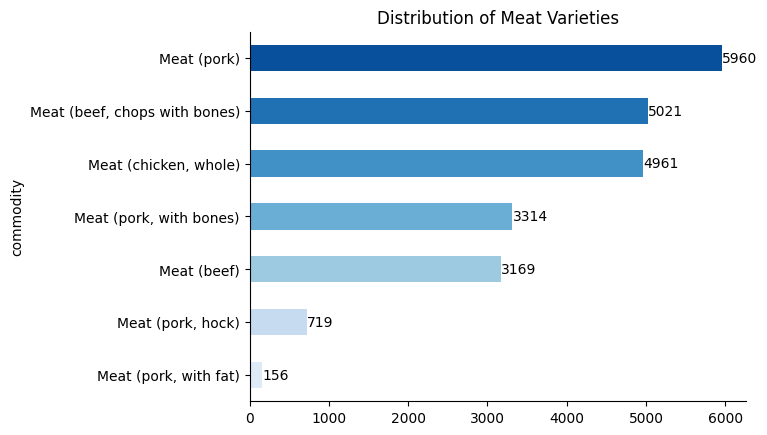

commodity
Meat (pork, with fat)             156
Meat (pork, hock)                 719
Meat (beef)                      3169
Meat (pork, with bones)          3314
Meat (chicken, whole)            4961
Meat (beef, chops with bones)    5021
Meat (pork)                      5960
dtype: int64


In [74]:
from matplotlib import pyplot as plt
import seaborn as sns

# Get veg variety counts and sort in ascending order
group1_meat_counts = group1_meat.groupby('commodity').size().sort_values()

# Create color palette (light to dark)
num_varieties = len(group1_meat_counts)
color_palette = sns.color_palette("Blues", num_varieties)  # Reversed Blues palette

# Plot with sorted data and color palette
ax = group1_meat_counts.plot(kind='barh', color=color_palette)  # Apply color palette
plt.title("Distribution of Meat Varieties")  # Set the title
plt.gca().spines[['top', 'right']].set_visible(False)

# Add values next to bars
for i, v in enumerate(group1_meat_counts):
    ax.text(v + 5, i, str(v), color='black', va='center') # Adjust v + 5 for spacing

plt.show() # to show the plot
print(group1_meat_counts)

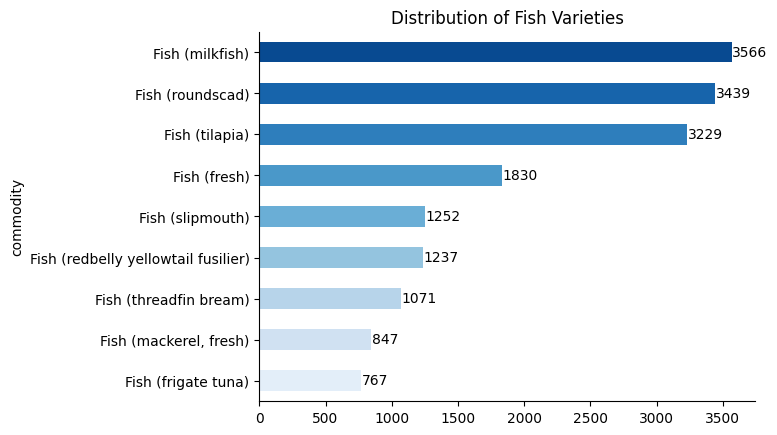

commodity
Fish (frigate tuna)                     767
Fish (mackerel, fresh)                  847
Fish (threadfin bream)                 1071
Fish (redbelly yellowtail fusilier)    1237
Fish (slipmouth)                       1252
Fish (fresh)                           1830
Fish (tilapia)                         3229
Fish (roundscad)                       3439
Fish (milkfish)                        3566
dtype: int64


In [75]:
from matplotlib import pyplot as plt
import seaborn as sns

# Get veg variety counts and sort in ascending order
group1_fish_counts = group2_fish.groupby('commodity').size().sort_values()

# Create color palette (light to dark)
num_varieties = len(group1_fish_counts)
color_palette = sns.color_palette("Blues", num_varieties)  # Reversed Blues palette

# Plot with sorted data and color palette
ax = group1_fish_counts.plot(kind='barh', color=color_palette)  # Apply color palette
plt.title("Distribution of Fish Varieties")  # Set the title
plt.gca().spines[['top', 'right']].set_visible(False)

# Add values next to bars
for i, v in enumerate(group1_fish_counts):
    ax.text(v + 5, i, str(v), color='black', va='center') # Adjust v + 5 for spacing

plt.show() # to show the plot
print(group1_fish_counts)

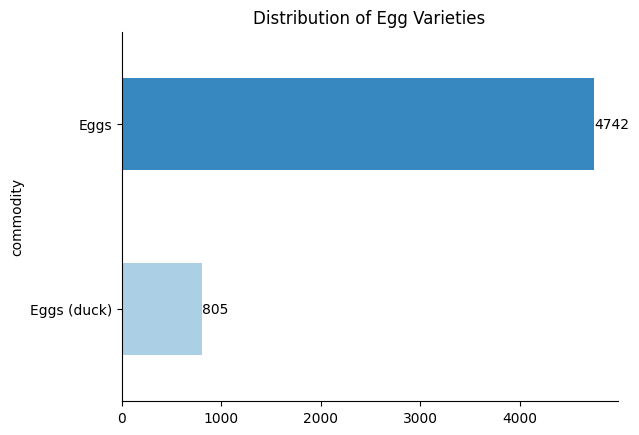

commodity
Eggs (duck)     805
Eggs           4742
dtype: int64


In [93]:
from matplotlib import pyplot as plt
import seaborn as sns

# Get veg variety counts and sort in ascending order
group3_eggs_counts = group3_eggs.groupby('commodity').size().sort_values()

# Create color palette (light to dark)
num_varieties = len(group3_eggs_counts)
color_palette = sns.color_palette("Blues", num_varieties)  # Reversed Blues palette

# Plot with sorted data and color palette
ax = group3_eggs_counts.plot(kind='barh', color=color_palette)  # Apply color palette
plt.title("Distribution of Egg Varieties")  # Set the title
plt.gca().spines[['top', 'right']].set_visible(False)

# Add values next to bars
for i, v in enumerate(group3_eggs_counts):
    ax.text(v + 5, i, str(v), color='black', va='center') # Adjust v + 5 for spacing

plt.show() # to show the plot
print(group3_eggs_counts)

#### Average price per year with meat, fish and eggs

<ipython-input-77-e320a7331c94>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1_meat['date'] = pd.to_datetime(group1_meat['date'])
<ipython-input-77-e320a7331c94>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1_meat['year'] = group1_meat['date'].dt.year
<ipython-input-77-e320a7331c94>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

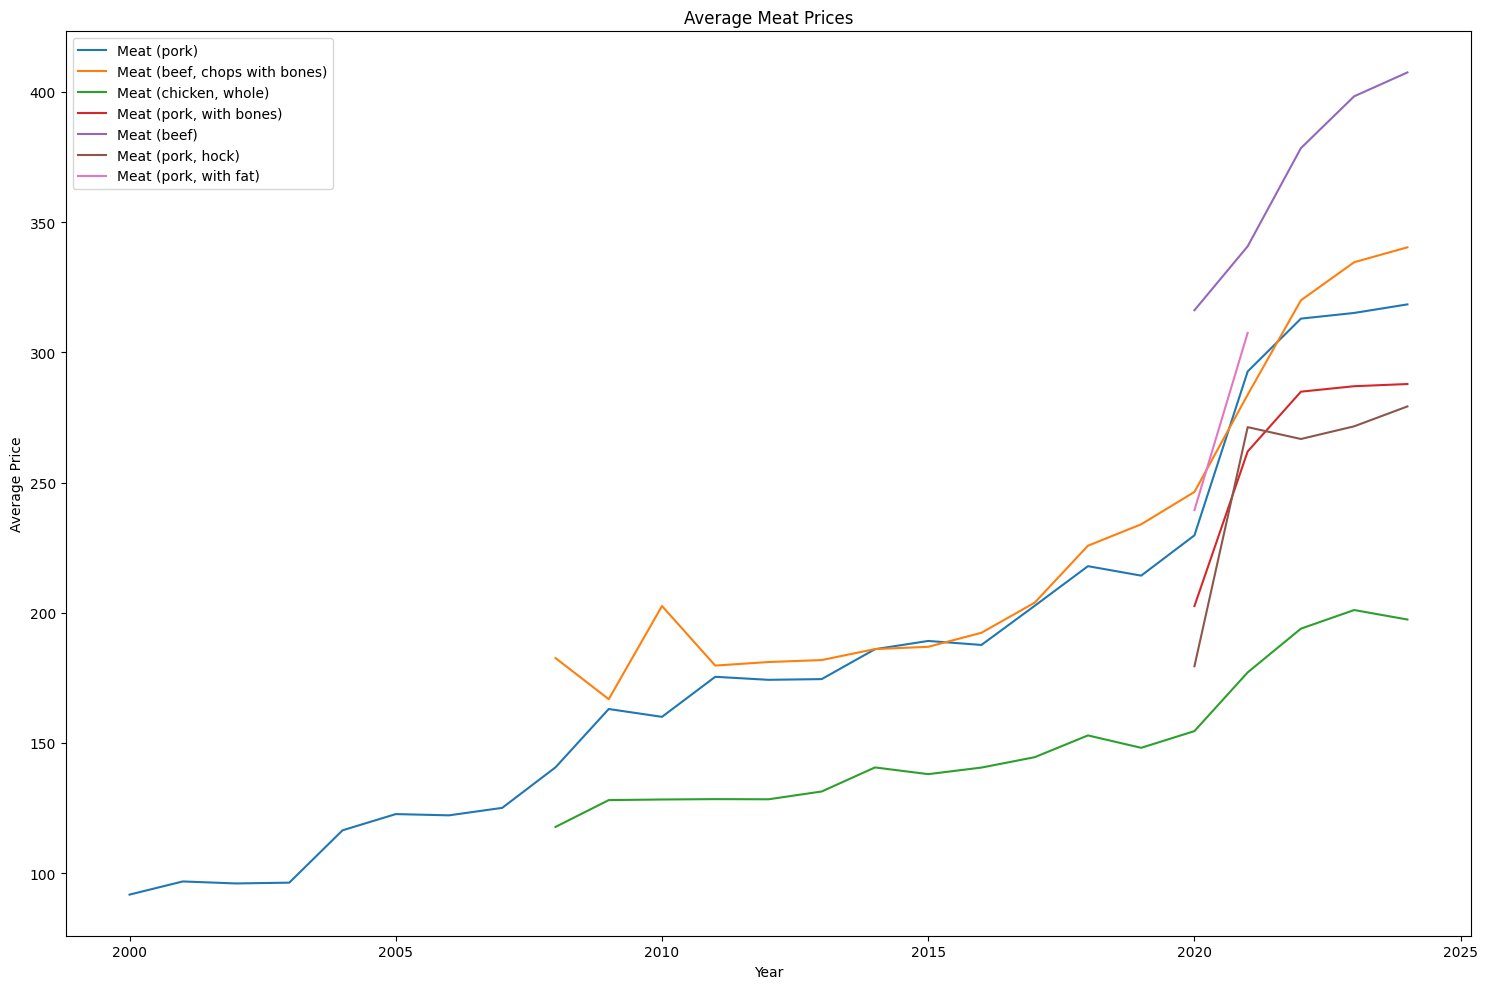

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'date' column to datetime format
group1_meat['date'] = pd.to_datetime(group1_meat['date'])

# Extract the year from the 'date' column
group1_meat['year'] = group1_meat['date'].dt.year

# Convert 'price' column to numeric, handling errors
group1_meat['price'] = pd.to_numeric(group1_meat['price'], errors='coerce') # This line handles the problem.

# Group the data by 'admin2' (province) and 'year', and calculate the average price for each province in each year
average_prices_province_yearly = group1_meat.groupby(['commodity', 'year'])['price'].mean().reset_index()

# Select the top 5 provinces based on the value counts
top_meat = group1_meat['commodity'].value_counts().head(10).index.tolist()

# Filter the data for the top 5 provinces
top_meat_data = average_prices_province_yearly[average_prices_province_yearly['commodity'].isin(top_meat)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the average rice prices for the top 5 provinces over the years
for meat in top_meat:
    meat_prices = top_meat_data[top_meat_data['commodity'] == meat]
    ax.plot(meat_prices['year'], meat_prices['price'], label=meat)

# Add labels and legend
ax.set_title('Average Meat Prices')
ax.set_xlabel('Year')
ax.set_ylabel('Average Price')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [78]:
# Assuming you have top_meat_data DataFrame
import numpy as np # Import numpy

def calculate_rate_of_change(data, commodity, start_year, end_year):
  """Calculates the rate of change of average prices for a given commodity
  between two years.

  Args:
    data: DataFrame containing commodity, year, and price.
    commodity: The commodity to calculate the rate of change for.
    start_year: The starting year.
    end_year: The ending year.

  Returns:
    The rate of change as a percentage, or np.nan if data is missing.
  """
  start_price_data = data[(data['commodity'] == commodity) & (data['year'] == start_year)]['price']
  end_price_data = data[(data['commodity'] == commodity) & (data['year'] == end_year)]['price']

  # Check if data is available for both years
  if start_price_data.empty or end_price_data.empty:
    return np.nan  # Return NaN if data is missing

  start_price = start_price_data.values[0]
  end_price = end_price_data.values[0]
  rate_of_change = ((end_price - start_price) / start_price) * 100
  return rate_of_change

# Get the minimum and maximum years in your data
min_year = 2000
max_year = 2020

# Calculate rate of change for each commodity between min_year and max_year
for commodity in top_meat_data['commodity'].unique():
  rate_change = calculate_rate_of_change(top_meat_data, commodity, min_year, max_year)
  print(f"Rate of change for {commodity} between {min_year} and {max_year}: {rate_change:.2f}%")

Rate of change for Meat (beef) between 2000 and 2020: nan%
Rate of change for Meat (beef, chops with bones) between 2000 and 2020: nan%
Rate of change for Meat (chicken, whole) between 2000 and 2020: nan%
Rate of change for Meat (pork) between 2000 and 2020: 150.36%
Rate of change for Meat (pork, hock) between 2000 and 2020: nan%
Rate of change for Meat (pork, with bones) between 2000 and 2020: nan%
Rate of change for Meat (pork, with fat) between 2000 and 2020: nan%


<ipython-input-91-9072eb3f0dde>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2_fish['date'] = pd.to_datetime(group2_fish['date'])
<ipython-input-91-9072eb3f0dde>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group2_fish['year'] = group2_fish['date'].dt.year
<ipython-input-91-9072eb3f0dde>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

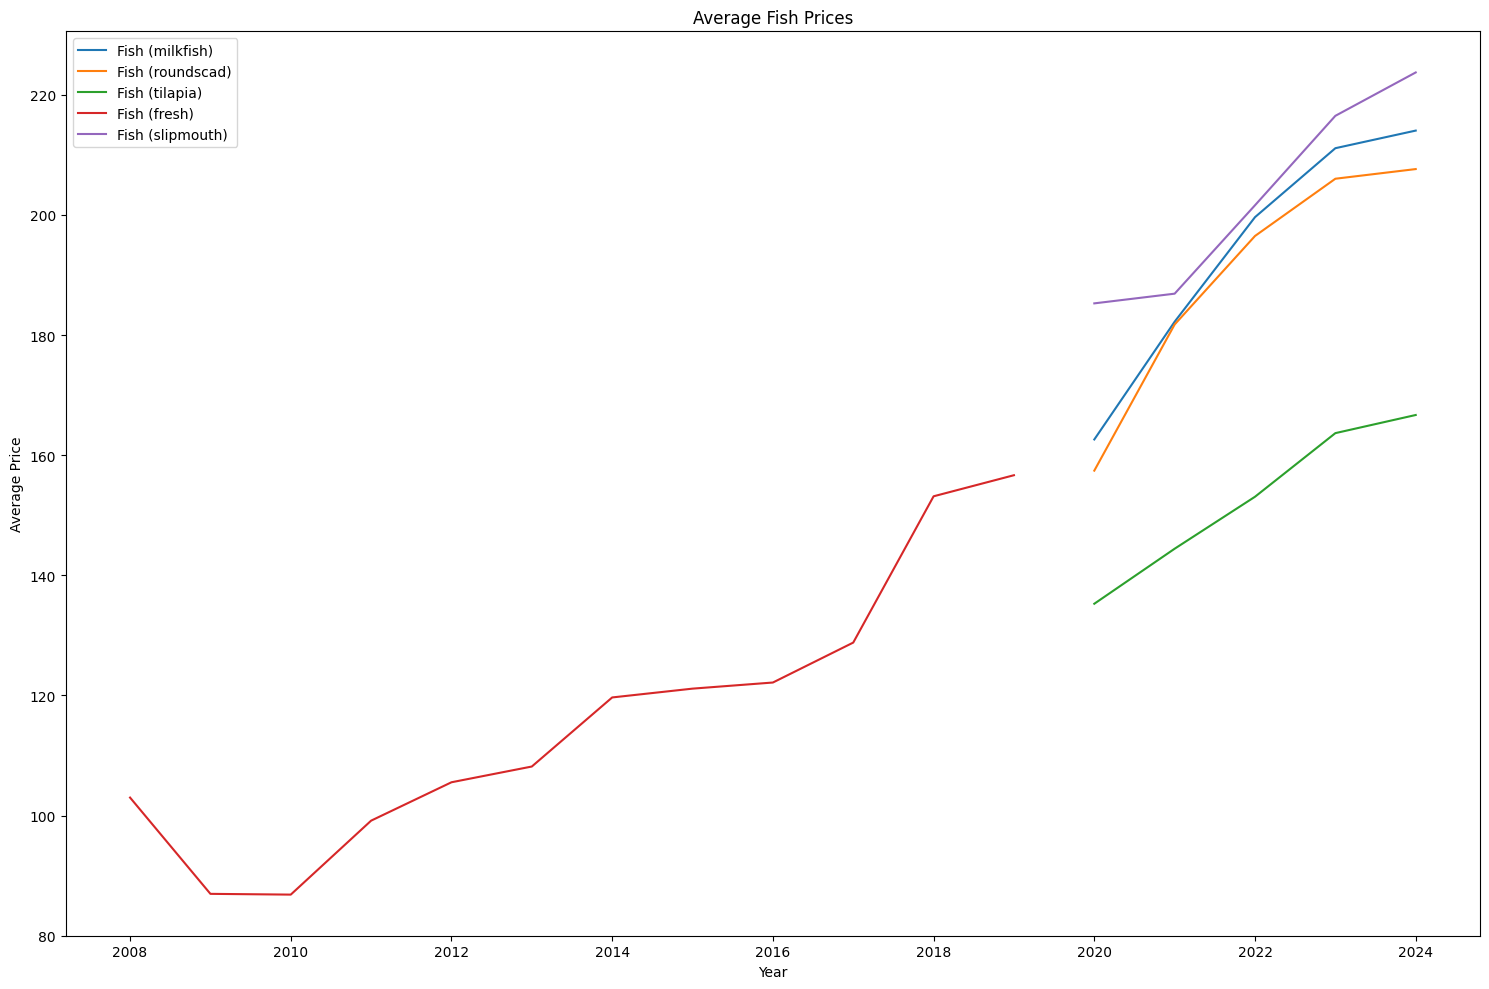

In [91]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'date' column to datetime format
group2_fish['date'] = pd.to_datetime(group2_fish['date'])

# Extract the year from the 'date' column
group2_fish['year'] = group2_fish['date'].dt.year

# Convert 'price' column to numeric, handling errors
group2_fish['price'] = pd.to_numeric(group2_fish['price'], errors='coerce') # This line handles the problem.

# Group the data by 'admin2' (province) and 'year', and calculate the average price for each province in each year
average_prices_province_yearly = group2_fish.groupby(['commodity', 'year'])['price'].mean().reset_index()

# Select the top 5 provinces based on the value counts
top_fish = group2_fish['commodity'].value_counts().head(5).index.tolist()

# Filter the data for the top 5 provinces
top_fish_data = average_prices_province_yearly[average_prices_province_yearly['commodity'].isin(top_fish)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the average rice prices for the top 5 provinces over the years
for fish in top_fish:
    fish_prices = top_fish_data[top_fish_data['commodity'] == fish]
    ax.plot(fish_prices['year'], fish_prices['price'], label=fish)

# Add labels and legend
ax.set_title('Average Fish Prices')
ax.set_xlabel('Year')
ax.set_ylabel('Average Price')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [92]:

import numpy as np # Import numpy

def calculate_rate_of_change(data, commodity, start_year, end_year):
  """Calculates the rate of change of average prices for a given commodity
  between two years.

  Args:
    data: DataFrame containing commodity, year, and price.
    commodity: The commodity to calculate the rate of change for.
    start_year: The starting year.
    end_year: The ending year.

  Returns:
    The rate of change as a percentage, or np.nan if data is missing.
  """
  start_price_data = data[(data['commodity'] == commodity) & (data['year'] == start_year)]['price']
  end_price_data = data[(data['commodity'] == commodity) & (data['year'] == end_year)]['price']

  # Check if data is available for both years
  if start_price_data.empty or end_price_data.empty:
    return np.nan  # Return NaN if data is missing

  start_price = start_price_data.values[0]
  end_price = end_price_data.values[0]
  rate_of_change = ((end_price - start_price) / start_price) * 100
  return rate_of_change

# Get the minimum and maximum years in your data
min_year = 2021
max_year = 2024

# Calculate rate of change for each commodity between min_year and max_year
for commodity in top_fish_data['commodity'].unique():
  rate_change = calculate_rate_of_change(top_fish_data, commodity, min_year, max_year)
  print(f"Rate of change for {commodity} between {min_year} and {max_year}: {rate_change:.2f}%")

Rate of change for Fish (fresh) between 2021 and 2024: nan%
Rate of change for Fish (milkfish) between 2021 and 2024: 17.46%
Rate of change for Fish (roundscad) between 2021 and 2024: 14.24%
Rate of change for Fish (slipmouth) between 2021 and 2024: 19.71%
Rate of change for Fish (tilapia) between 2021 and 2024: 15.42%


<ipython-input-94-27e41c3b8842>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group3_eggs['date'] = pd.to_datetime(group3_eggs['date'])
<ipython-input-94-27e41c3b8842>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group3_eggs['year'] = group3_eggs['date'].dt.year
<ipython-input-94-27e41c3b8842>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

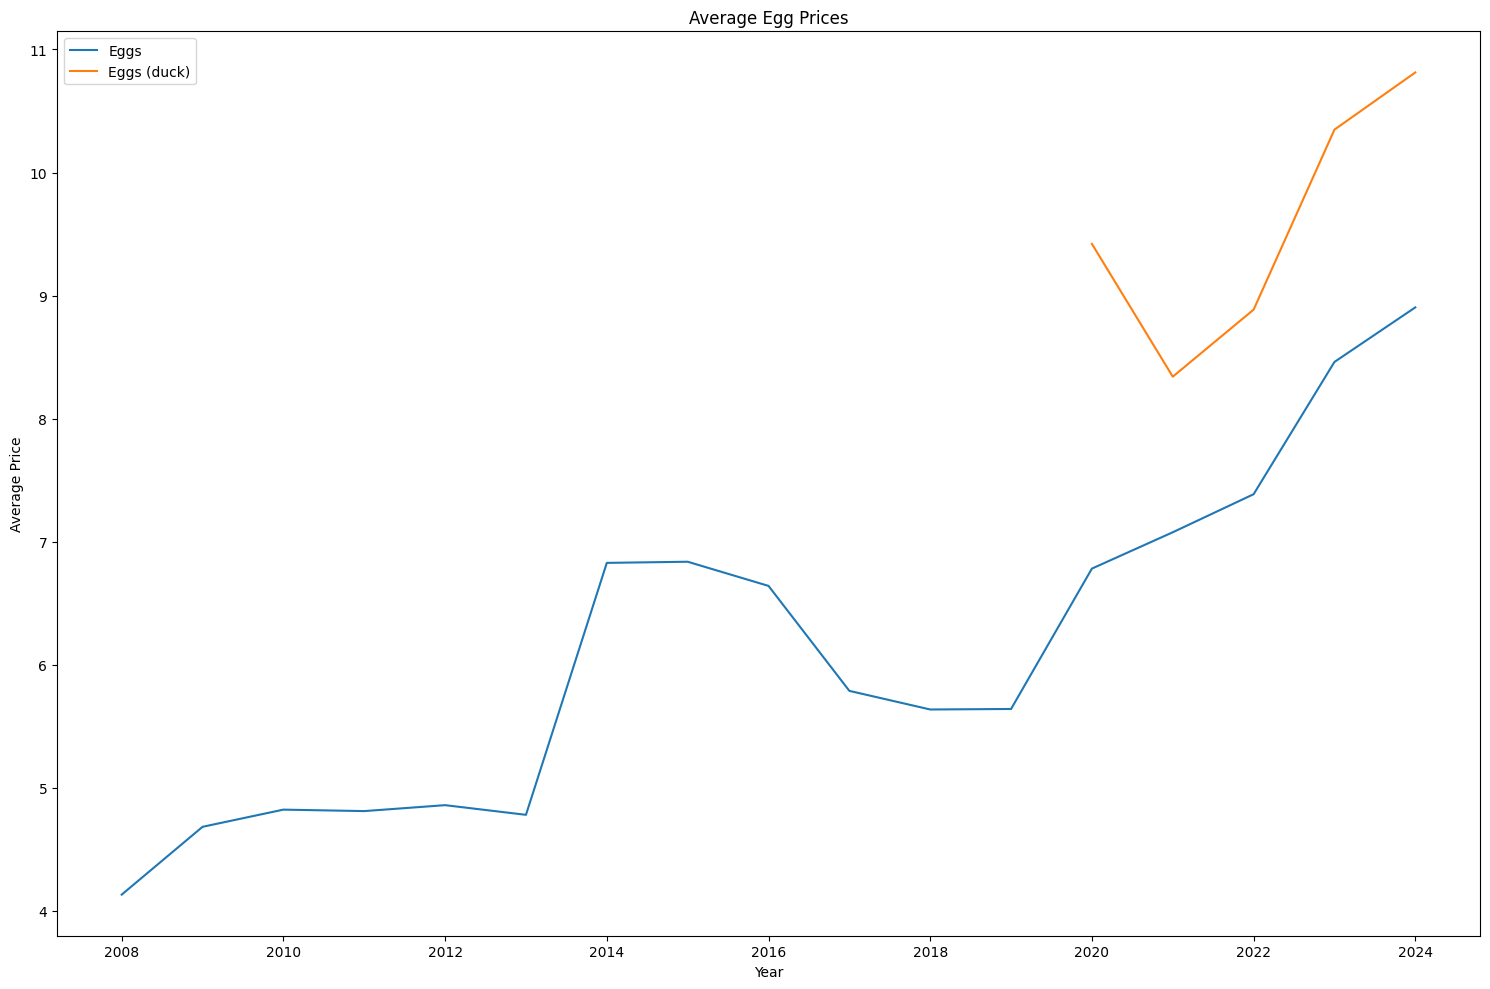

In [94]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'date' column to datetime format
group3_eggs['date'] = pd.to_datetime(group3_eggs['date'])

# Extract the year from the 'date' column
group3_eggs['year'] = group3_eggs['date'].dt.year

# Convert 'price' column to numeric, handling errors
group3_eggs['price'] = pd.to_numeric(group3_eggs['price'], errors='coerce') # This line handles the problem.

# Group the data by 'admin2' (province) and 'year', and calculate the average price for each province in each year
average_prices_province_yearly = group3_eggs.groupby(['commodity', 'year'])['price'].mean().reset_index()

# Select the top 5 provinces based on the value counts
top_egg = group3_eggs['commodity'].value_counts().head(6).index.tolist()

# Filter the data for the top 5 provinces
top_egg_data = average_prices_province_yearly[average_prices_province_yearly['commodity'].isin(top_egg)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the average rice prices for the top 5 provinces over the years
for egg in top_egg:
    egg_prices = top_egg_data[top_egg_data['commodity'] == egg]
    ax.plot(egg_prices['year'], egg_prices['price'], label=egg)

# Add labels and legend
ax.set_title('Average Egg Prices')
ax.set_xlabel('Year')
ax.set_ylabel('Average Price')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [81]:
# Assuming you have top_rice_data DataFrame
import numpy as np # Import numpy

def calculate_rate_of_change(data, commodity, start_year, end_year):
  """Calculates the rate of change of average prices for a given commodity
  between two years.

  Args:
    data: DataFrame containing commodity, year, and price.
    commodity: The commodity to calculate the rate of change for.
    start_year: The starting year.
    end_year: The ending year.

  Returns:
    The rate of change as a percentage, or np.nan if data is missing.
  """
  start_price_data = data[(data['commodity'] == commodity) & (data['year'] == start_year)]['price']
  end_price_data = data[(data['commodity'] == commodity) & (data['year'] == end_year)]['price']

  # Check if data is available for both years
  if start_price_data.empty or end_price_data.empty:
    return np.nan  # Return NaN if data is missing

  start_price = start_price_data.values[0]
  end_price = end_price_data.values[0]
  rate_of_change = ((end_price - start_price) / start_price) * 100
  return rate_of_change

# Get the minimum and maximum years in your data
min_year = 2008
max_year = 2024

# Calculate rate of change for each commodity between min_year and max_year
for commodity in top_egg_data['commodity'].unique():
  rate_change = calculate_rate_of_change(top_egg_data, commodity, min_year, max_year)
  print(f"Rate of change for {commodity} between {min_year} and {max_year}: {rate_change:.2f}%")

Rate of change for Eggs between 2008 and 2024: 115.51%
Rate of change for Eggs (duck) between 2008 and 2024: nan%


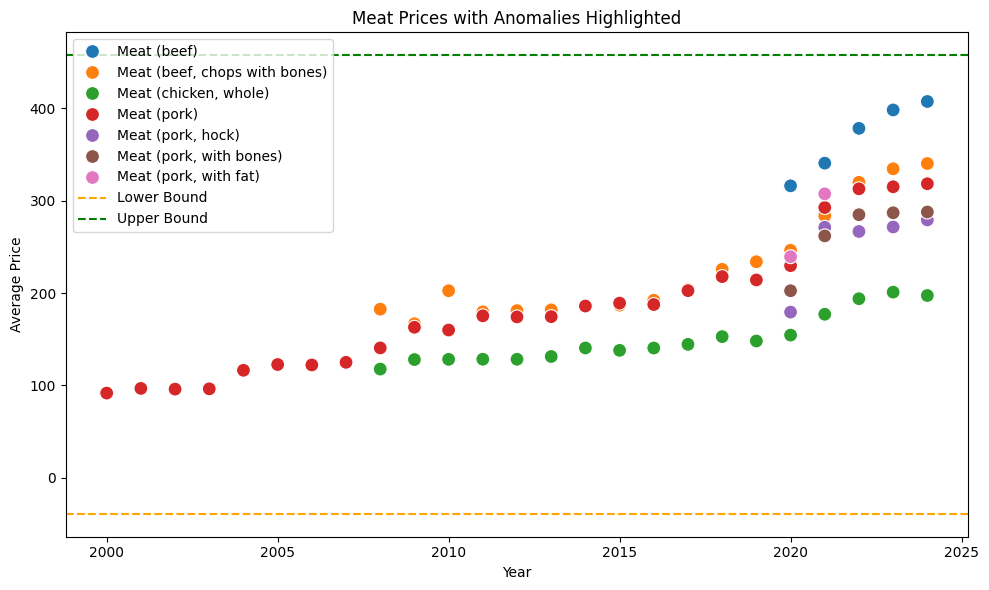

In [87]:
import pandas as pd
import numpy as np

def find_anomalies_iqr(data):
  """
  Identifies anomalies in the 'price' column of the data using the IQR method.

  Args:
    data: A pandas DataFrame with columns 'commodity', 'year', and 'price'.

  Returns:
    A pandas DataFrame containing the anomalies, lower bound, and upper bound.
  """

  # Calculate quantiles
  Q1 = data['price'].quantile(0.25)
  Q3 = data['price'].quantile(0.75)
  IQR = Q3 - Q1

  # Define upper and lower bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify anomalies
  anomalies = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]

  return anomalies, lower_bound, upper_bound # Return lower_bound and upper_bound

# Assuming 'top_maize_data' already exists
data_meat = top_meat_data[['commodity', 'year', 'price']].copy()

# Find anomalies, lower bound, and upper bound
anomalies, lower_bound, upper_bound = find_anomalies_iqr(data_meat)

# Create scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x='year', y='price', hue='commodity', data=data_meat, s=100)  # Use seaborn for scatter plot

# Highlight anomalies in red
sns.scatterplot(x='year', y='price', data=anomalies, color='red', marker='x', s=200, label='Anomalies')

# Add horizontal lines for bounds
plt.axhline(y=lower_bound, color='orange', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='green', linestyle='--', label='Upper Bound')

plt.title('Meat Prices with Anomalies Highlighted')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.tight_layout()
plt.show()

#### Summary for Meat, Fish and Eggs

**Distribution of Meat Varieties:**

- Most Common: Meat (chicken, whole) is the most frequently recorded meat variety.
- Least Common: Meat (pork, with fat) is the least frequently recorded meat variety.
- Variety: The data includes different cuts of meat (beef, pork, chicken) with varying specifications (e.g., with bones, with fat, hock).

**Distribution of Fish Varieties:**

- Most Common: Fish (milkfish) is the most frequently recorded fish variety.
- Least Common: Fish (frigate tuna) is the least frequently recorded fish variety.
- Variety: The data includes a range of fish species, including freshwater and saltwater varieties.

**Distribution of Egg Varieties:**

- Most Common: Regular Eggs are the most frequently recorded egg variety.
- Variety: The data includes both regular eggs and duck eggs.

**Rate of Change**

Meat:
- Meat (pork) shows a significant growth rate of 150.36% between 2000 and 2020.

Fish:
- Fish (milkfish) shows a moderate growth rate of 17.46% between 2021 and 2024.
Other fish varieties also show moderate growth rates.

Eggs:
- Regular Eggs show a substantial growth rate of 115.51% between 2008 and 2024.